Github Repository: https://github.com/catebros/ML-fundamentals-2025/tree/main

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import scipy
from IPython.display import display

path = 'hour.csv'

Preconditions for Supervised Learning
1. We have a labeled dataset
2. We split the dataset into training, validation, and test sets.
3. Records in the validation and test sets are statistically similar.
4. We engineered features and filled missing values using only the training data.
5. We converted all examples into numerical feature vectors.
6. We selected a performance metric that returns a single number.
7. We have a baseline.

# Task 1: Exploratory Data Analysis (EDA)
Lecture material: Lecture 6 (slides 4–16), Lecture 7(slides 3–9), Lecture 8(slides 2–5)
- Load the hour.csv dataset. 
- Examine the target variable (cnt) distribution and identify its skewness. 
- Explore analytically the influence of temporal (hr, weekday, mnth, season), binary (holiday, workingday), and weather-related features(temp, atemp, hum, windspeed, weathersit) on cnt
- Visualize relationships using, forexample, scatterplots, boxplots, and line plots grouped by hour,day,and season, or any other analysis/plot you deem necessary
- Identify any suspicious patterns, outliers, or anomalies.
- Consider dropping the columns instant, dteday, casual, and registered

## Inital exploration

In [112]:
df = pd.read_csv(path)

In [113]:
df.shape

(17379, 17)

In [114]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [115]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [116]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

 **Variables of the dataset**
- Temporal:
    - dteday
    - season
    - yr
    - mnth
    - hr
    - weekday
- Binary:
    - holiday
    - workingday
- Weather:
    - Categorical:
        - weathersit
    - Numerical:
        - temp
        - atemp
        - hum
        - windspeed
- Other:
    - instant
    - casual
    - registered
- Target:
    - cnt



### Missing values:

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We know we don't have missing values in the dataset

## Basic Count plots

In [119]:
df['cnt'].max()

np.int64(977)

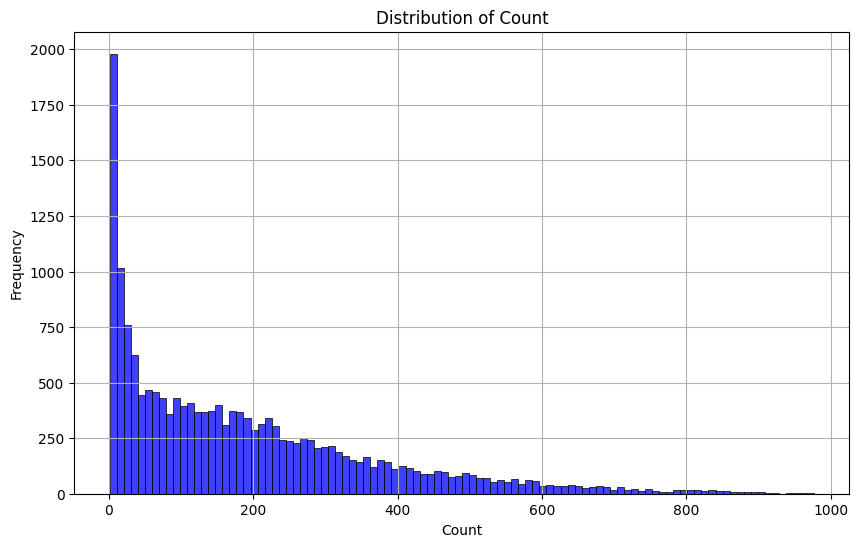

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=100, color='blue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

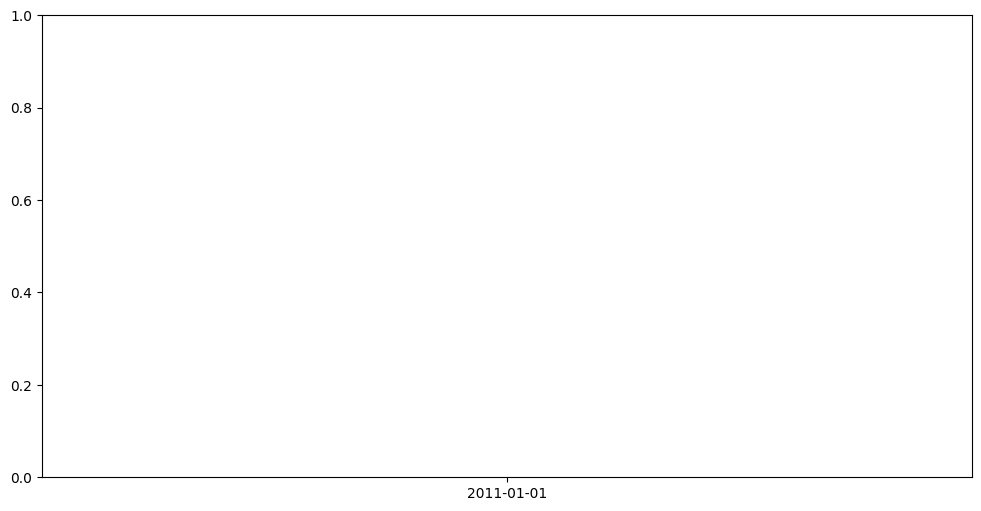

In [121]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['dteday'], y=df['cnt'], label='Total Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count through time')
plt.legend()
plt.show()

### Skewness

Visually, we can observe that the data is right-skewed. However, it is better to use a quantitative measure to assess this. For this, we can use the .skew() function. If the value is greater than zero, it indicates right skewness. Additionally, by comparing the mean and median, we can see a significant difference of 45 units, or a 4% difference when considering the range of values, which confirms a moderate right skewness.

In [ ]:
from scipy.stats import skew

skewness = skew(df['cnt'])
print('Skewness:', skewness)

mean_value = df['cnt'].mean()
median_value = df['cnt'].median()

print('Mean:', mean_value)
print('Median:', median_value)
print('Proportion of difference', abs(mean_value - median_value)/df['cnt'].max() *100, '%')

Skewness: 1.2773013463494975
Mean: 189.46308763450142
Median: 142.0
Proportion of difference 4.858043770163912 %


Based on this, I will use the log transformation to reduce the skewness of the data and make it more normally distributed. I am using the log1p function specifically to handle any zero values in the data. log1p is the natural logarithm of one plus the input value, ensuring that zeros are transformed without causing mathematical issues (since log(0) is undefined). This avoids the need to add a small constant manually.

In [ ]:
df['cnt_original'] = df['cnt'].copy()
df['cnt'] = np.log1p(df['cnt'])

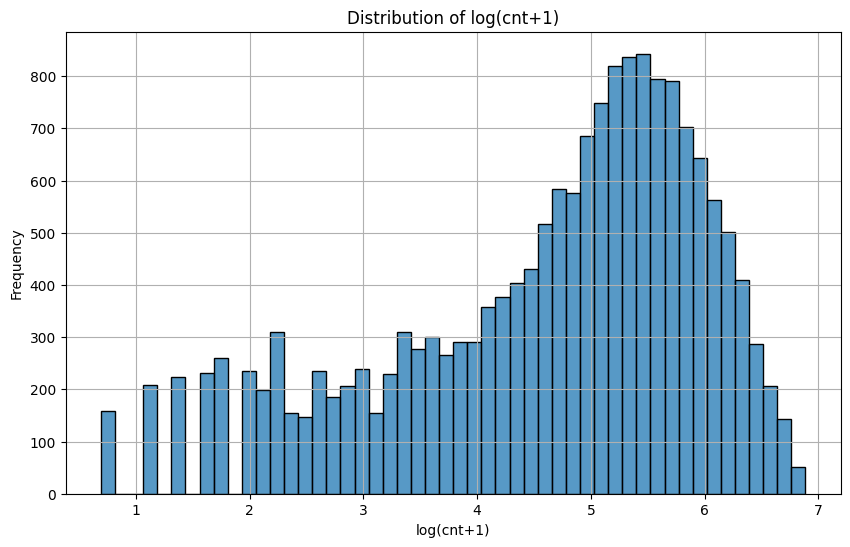

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=50)
plt.xlabel('log(cnt+1)')
plt.ylabel('Frequency')
plt.title('Distribution of log(cnt+1)')
plt.grid(True)
plt.show()

### Outliers

#### 1.5 * IQR

In [ ]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers in 'cnt': {outliers.shape[0]}")

Number of outliers in 'cnt': 158


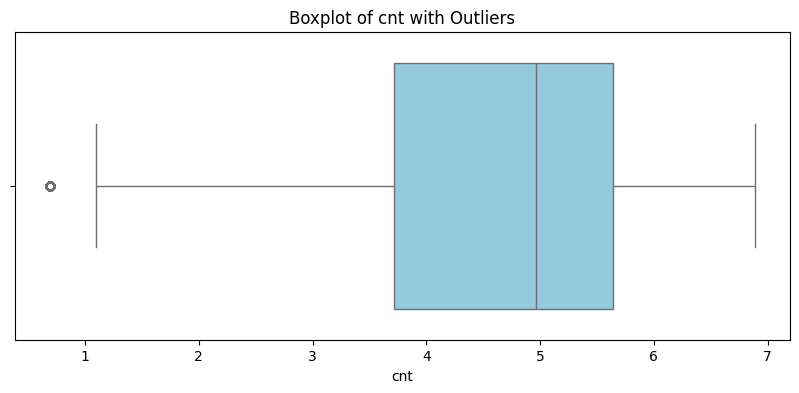

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['cnt'], color='skyblue')
plt.title('Boxplot of cnt with Outliers')
plt.xlabel('cnt')
plt.show()

In [ ]:
# outliers plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='instant', y='cnt', data=df, label='Normal', alpha=0.6)
sns.scatterplot(x='instant', y='cnt', data=outliers, color='red', label='Outliers')
plt.title("Outliers in cnt over Time (log)")
plt.xlabel("Instant")
plt.ylabel("cnt")
plt.legend()
plt.show()

# outlier plot with original cnt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='instant', y='cnt_original', data=df, label='Normal', alpha=0.6)
sns.scatterplot(x='instant', y='cnt_original', data=outliers, color='red', label='Outliers')
plt.title("Outliers in cnt over Time")
plt.xlabel("Instant")
plt.ylabel("cnt")
plt.legend()
plt.show()

ValueError: Could not interpret value `instant` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

Based on the plot, we can see that there are some data points outside the 1.5 IQR, which is a common threshold for identifying outliers. However, we must be cautious when interpreting these outliers, as they may not necessarily be errors or anomalies. Instead, they could be a result of an increasing trend in the data.


Because of this, I prefer not to remove them but to keep them in the dataset and analyze them further in relation to each feature. 

#### 3 * IQR

In [ ]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers in 'cnt': {outliers.shape[0]}")

Number of outliers in 'cnt': 0


A 3 IQR threshold is a less strict criterion for identifying outliers, as it allows a broader range of values and can help detect more extreme values that may be affecting the analysis. As we can see, there are no data points outside the 3 IQR threshold, which suggests that the data is relatively clean and does not contain extreme outliers

## Temporal features

- dteday
- season
- yr
- mnth
- hr
- weekday

### Date = dteday

The dteday column is a date column that contains the date of each observation. In this dataset, they have already extracted the year, month, day, and hour from dteday column and created separate columns for each of these features. So this column is not needed for the analysis, and it will be (later) dropped from the dataset.

We need to check if the dataset is full for each hour in each day of the calendar.

In [ ]:
missing_dteday = df['dteday'].isnull().sum()
print(f"Missing values in 'dteday': {missing_dteday}")

Missing values in 'dteday': 0


In [ ]:
hour_counts = df.groupby('dteday')['hr'].nunique().reset_index()
incomplete_days = hour_counts[hour_counts['hr'] < 24]

print(f"Number of days with missing hourly data: {len(incomplete_days)}")
display(incomplete_days.sort_values('hr').sort_values('dteday'))
for date in incomplete_days['dteday']:
    hours_present = set(df[df['dteday'] == date]['hr'])
    missing_hours = sorted(set(range(24)) - hours_present)
    print(f"{date} is missing hours: {missing_hours}")

Number of days with missing hourly data: 76


dteday  hr
1    2011-01-02  23
2    2011-01-03  22
3    2011-01-04  23
4    2011-01-05  23
5    2011-01-06  23
..          ...  ..
668  2012-10-30  11
677  2012-11-08  23
698  2012-11-29  23
723  2012-12-24  23
724  2012-12-25  23

[76 rows x 2 columns]

2011-01-02 is missing hours: [5]
2011-01-03 is missing hours: [2, 3]
2011-01-04 is missing hours: [3]
2011-01-05 is missing hours: [3]
2011-01-06 is missing hours: [3]
2011-01-07 is missing hours: [3]
2011-01-11 is missing hours: [3, 4]
2011-01-12 is missing hours: [3, 4]
2011-01-14 is missing hours: [4]
2011-01-18 is missing hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2011-01-19 is missing hours: [3]
2011-01-22 is missing hours: [5]
2011-01-23 is missing hours: [4]
2011-01-24 is missing hours: [2]
2011-01-25 is missing hours: [3]
2011-01-26 is missing hours: [3, 4, 18, 19, 20, 21, 22, 23]
2011-01-27 is missing hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2011-01-28 is missing hours: [4]
2011-01-29 is missing hours: [5]
2011-01-30 is missing hours: [6]
2011-02-01 is missing hours: [4]
2011-02-03 is missing hours: [4]
2011-02-04 is missing hours: [4]
2011-02-09 is missing hours: [4]
2011-02-10 is missing hours: [3]
2011-02-11 is missing hours: [3, 4]
2011-02-13 is mis

This means that there are 76 days with atleast 1 hour of data missing. This is bad, because it means that we cannot use the data for those days in our analysis. We need to find a way to deal with this. However, it’s also important to note that this missing data may not significantly affect the analysis, as we are not performing time series forecasting. In the models we are using like linear regression, random forest, and XGBoost, the model is not explicitly dependent on the continuity of time, but rather on the relationships between features. Additionally, even with some hours missing, the available data still captures a large portion of the relevant information for training the model.

### Season = season

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

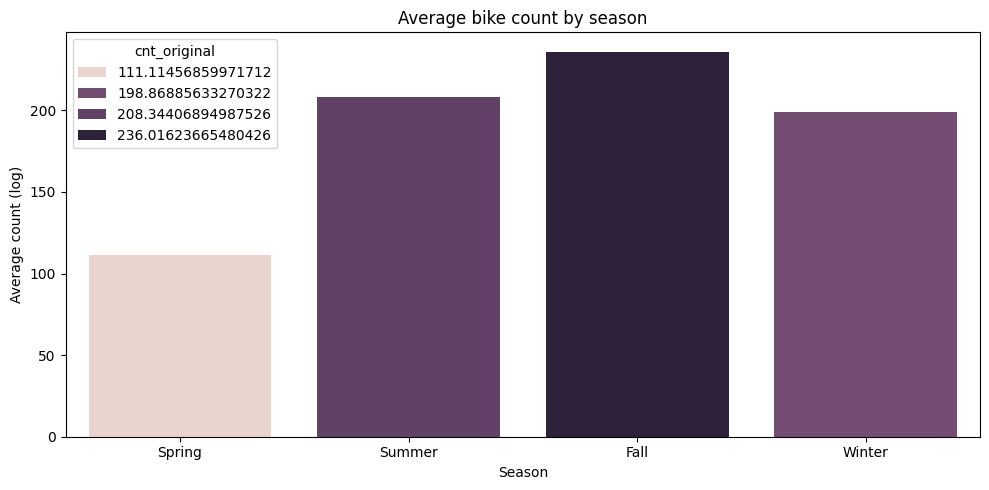

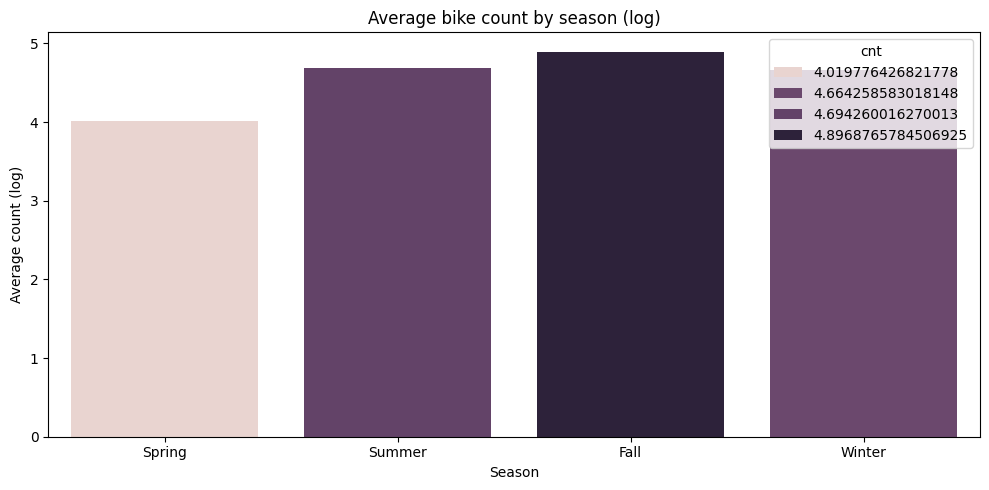

In [ ]:
# average count by season
season_avg = df.groupby('season')['cnt_original'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=season_avg, x='season', y='cnt_original', hue= 'cnt_original')

plt.title('Average bike count by season')
plt.xlabel('Season')
plt.ylabel('Average count')
plt.xticks(ticks=range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.tight_layout()
plt.show()

# average count by season (log)
season_avg = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=season_avg, x='season', y='cnt', hue= 'cnt')

plt.title('Average bike count by season (log)')
plt.xlabel('Season')
plt.ylabel('Average count (log)')
plt.xticks(ticks=range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.tight_layout()
plt.show()

Based on this, the season with the most bike rentals is autumn, followed by summer, winter, and spring. This makes sense with the fact that autumn is a popular season for outdoor activities, including commuting, which likely leads to higher bike rental demand. Summer is also a popular season for outdoor activities, but it does not surpass autumn in terms of rentals. Winter and spring are less popular for bike rentals, which is consistent with the colder weather during these seasons, leading to fewer outdoor activities and lower demand for bike rentals.

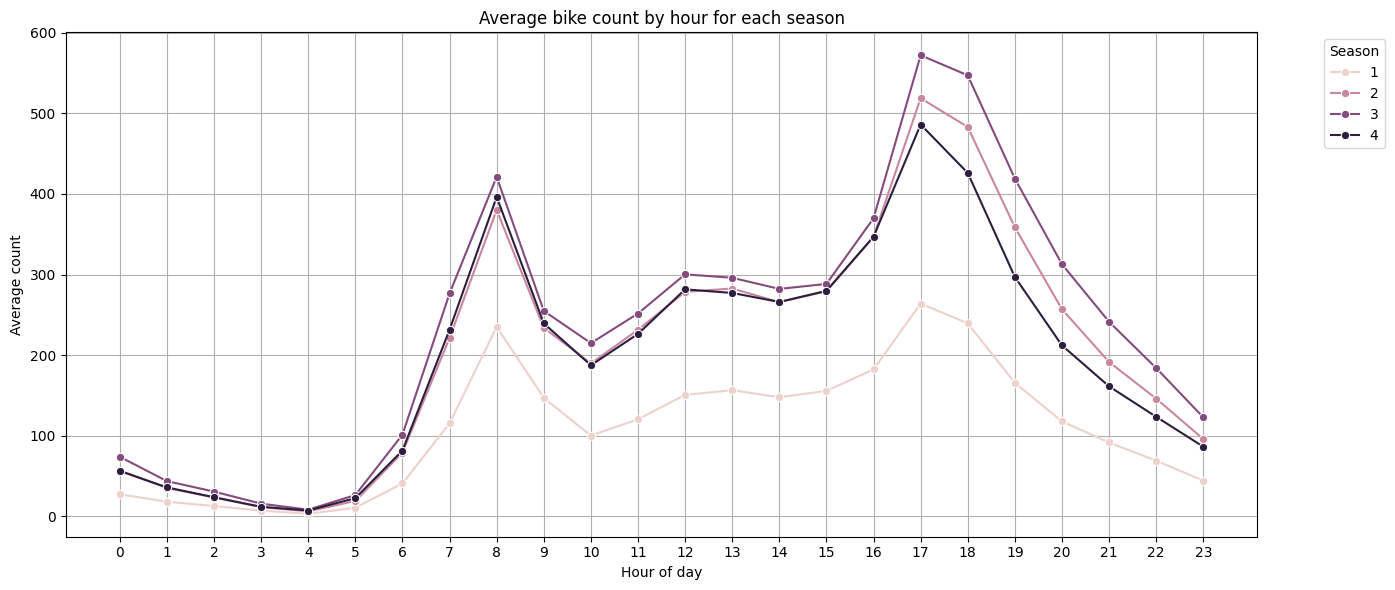

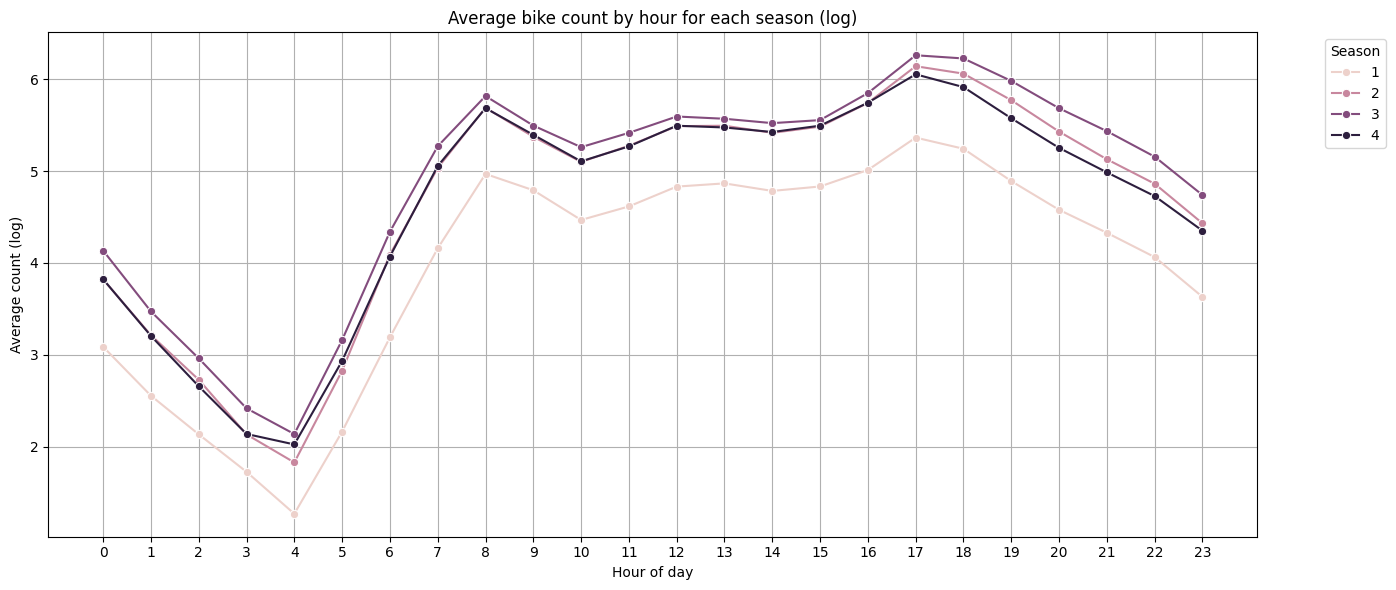

In [ ]:
# average count by hour
season_hour_avg = df.groupby(['season', 'hr'])['cnt_original'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=season_hour_avg, x='hr', y='cnt_original', hue='season', marker='o')

plt.title('Average bike count by hour for each season')
plt.xlabel('Hour of day')
plt.ylabel('Average count')
plt.grid(True)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# average count by hour (log)
season_hour_avg = df.groupby(['season', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=season_hour_avg, x='hr', y='cnt', hue='season', marker='o')

plt.title('Average bike count by hour for each season (log)')
plt.xlabel('Hour of day')
plt.ylabel('Average count (log)')
plt.grid(True)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Year = yr

In [ ]:
df['yr'].unique()

array([0, 1])

Based on the previous count outlier plots, we can already see that year will be a very important feature, as the data spans 2011 and 2012, and we observe an increasing trend in the values over time.

In [ ]:
# without log transformation
yearly_stats = df.groupby('yr')['cnt_original'].agg(['mean', 'sum']).reset_index()
yearly_stats['yr'] = yearly_stats['yr'].map({0: '2011', 1: '2012'})

print(yearly_stats)

     yr        mean      sum
0  2011  143.794448  1243103
1  2012  234.666361  2049576


In [ ]:
# with log transformation
yearly_stats = df.groupby('yr')['cnt'].agg(['mean', 'sum']).reset_index()
yearly_stats['yr'] = yearly_stats['yr'].map({0: '2011', 1: '2012'})

print(yearly_stats)

     yr      mean           sum
0  2011  4.334035  37467.730051
1  2012  4.812990  42036.653384


Once we transform the cnt variable using the log1p function, we can see that the difference in mean and sum between the two years is reduced, which suggests that the data is more normally distributed after the transformation.

### Month = mnth

In [ ]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

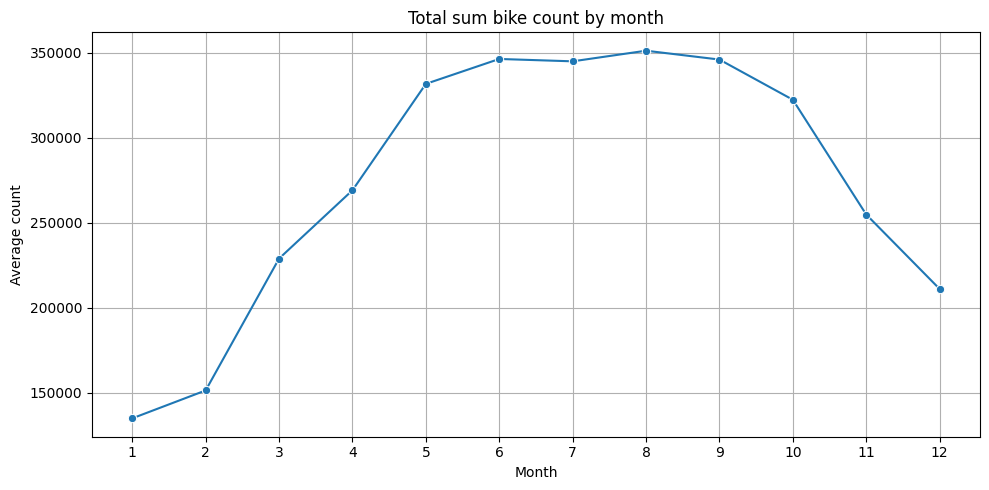

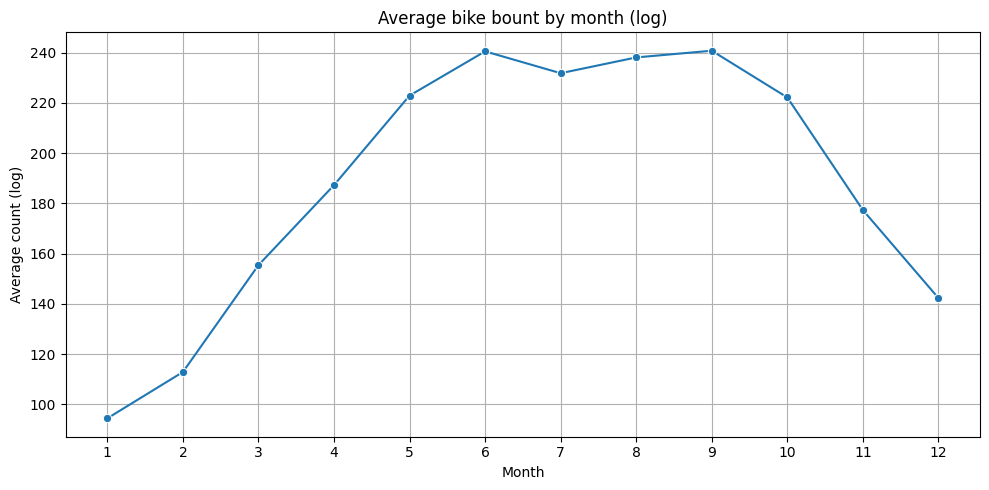

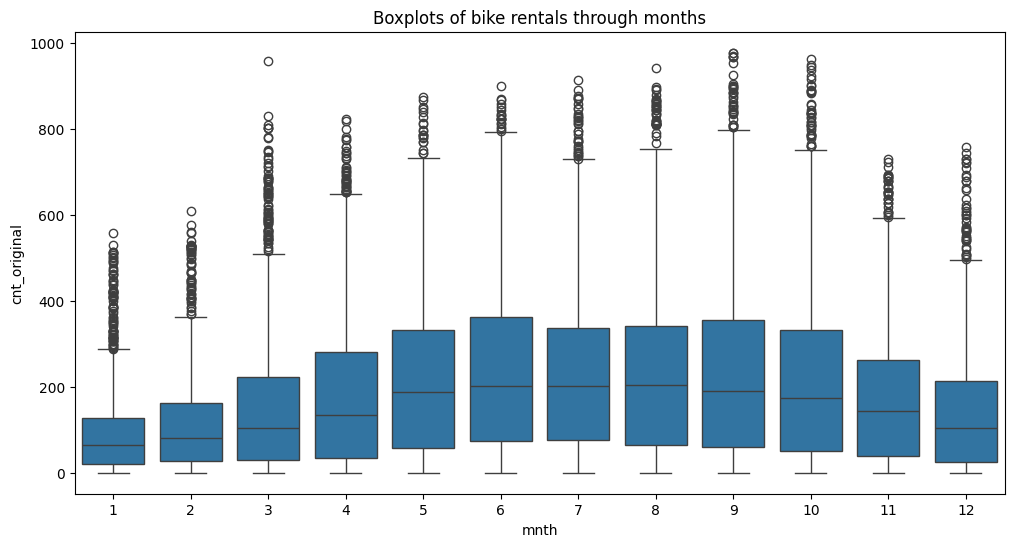

In [ ]:
# average count by month
monthly_sum = df.groupby('mnth')['cnt_original'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sum, x='mnth', y='cnt_original', marker='o')

plt.title('Total sum bike count by month')
plt.xlabel('Month')
plt.ylabel('Average count')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

# average count by month (log)
monthly_avg = df.groupby('mnth')['cnt_original'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='mnth', y='cnt_original', marker='o')

plt.title('Average bike bount by month (log)')
plt.xlabel('Month')
plt.ylabel('Average count (log)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

# boxplot count by month 
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt_original', data=df)
plt.title('Boxplots of bike rentals through months')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months (log)')]

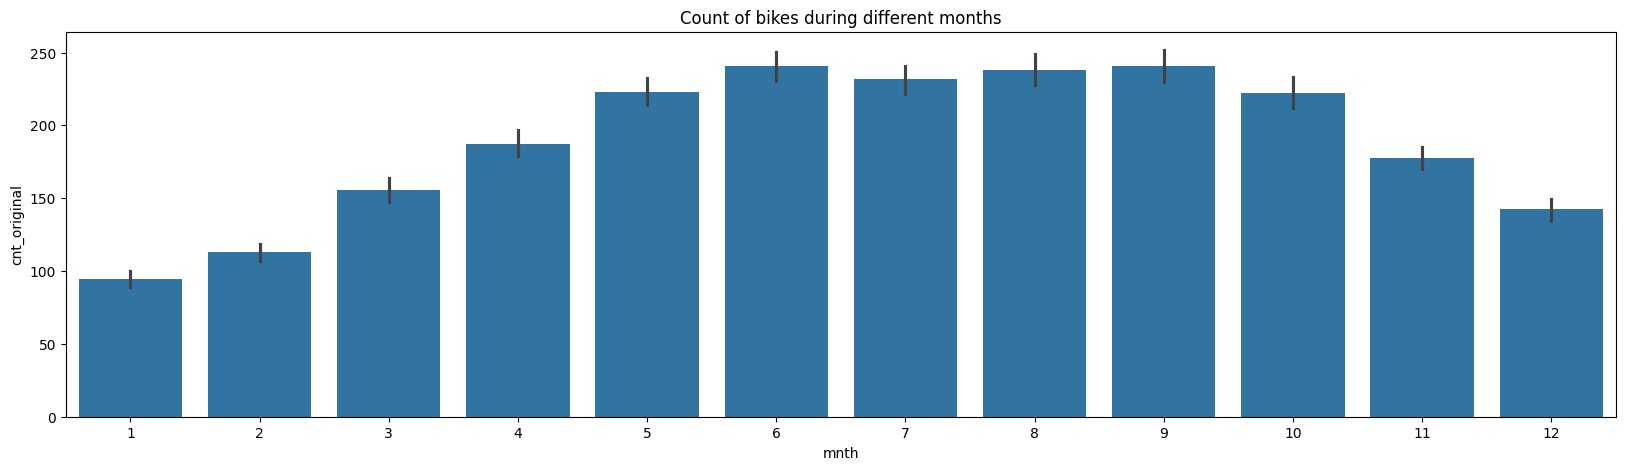

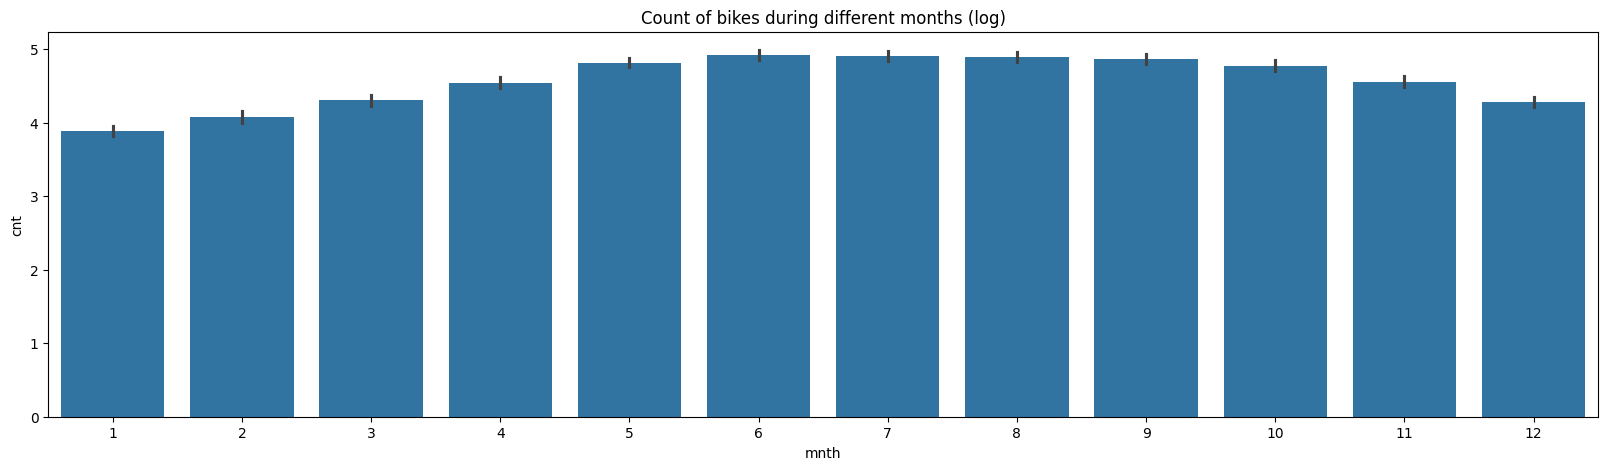

In [ ]:
# average count by month
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='mnth', y='cnt_original', ax=ax)
ax.set(title='Average rental of bikes during different months')

# average count by month (log)
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Average rental of bikes during different months (log)')

We can see that the number of bike rentals (cnt) is higher in the summer months, which is consistent with the idea that people are more likely to use bikes in warmer weather. Specifically, June and September have the highest cnt values, likely due to the school season, which means that people are more likely to use bikes for commuting to work or school. In contrast, January and February have the lowest cnt values, which can be attributed to the colder weather and the fact that people are less inclined to use bikes during this time.


After applying the log transformation, we observe that the differences between the various months become less pronounced.

### Hour = hr

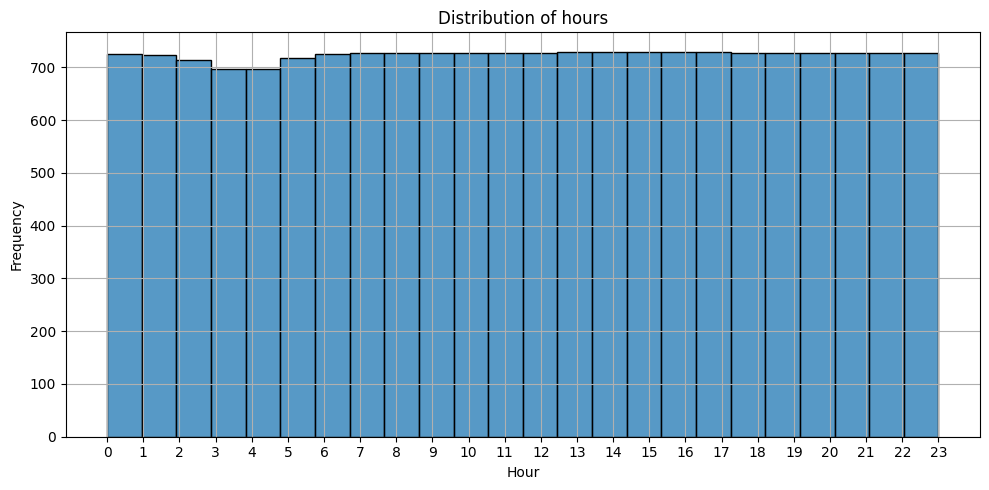

In [ ]:
# distribution of hours
plt.figure(figsize=(10, 5))
sns.histplot(df['hr'], bins=24, kde=False)
plt.title('Distribution of hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

The missing values observed between 1 AM and 6 AM are the same ones identified earlier in the dteday section. These are the missing entries in our dataset, mostly occurring during the night hours.

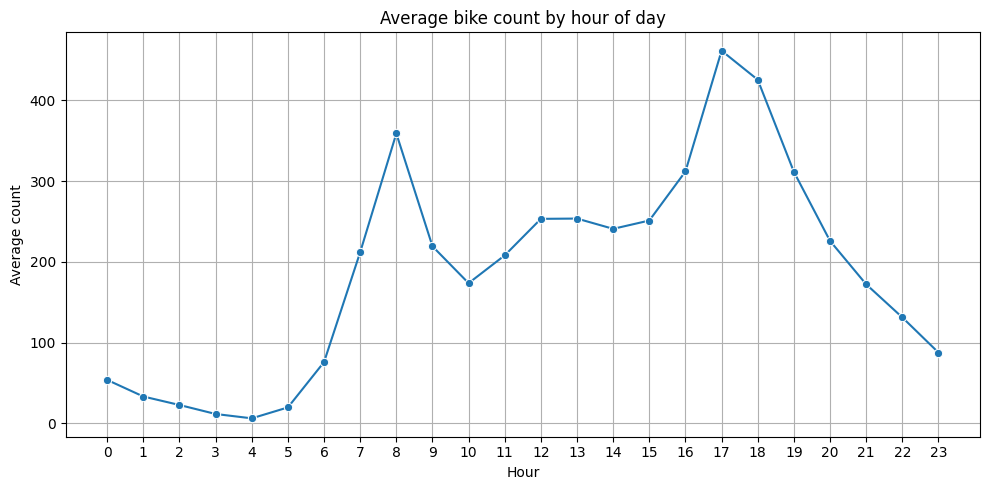

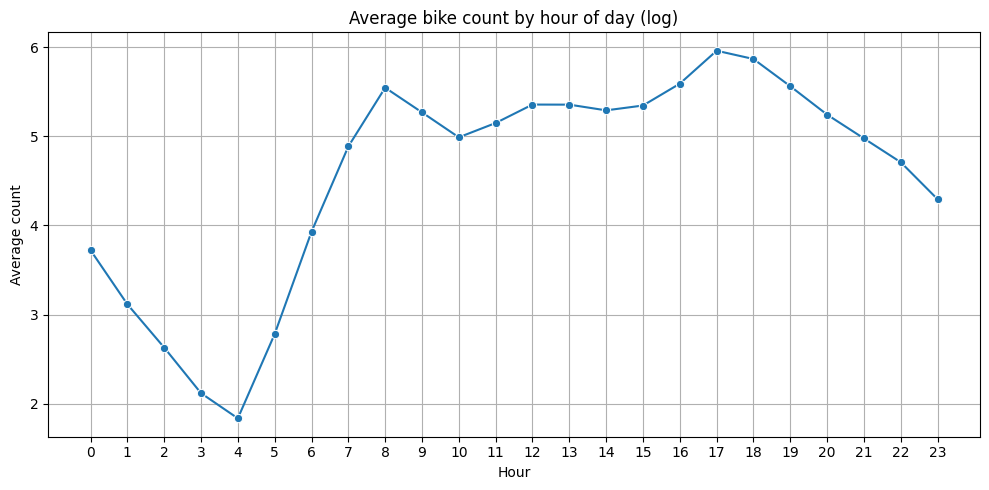

In [ ]:
# average count by hour of the day
hourly_avg = df.groupby('hr')['cnt_original'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg, x='hr', y='cnt_original', marker='o')
plt.title('Average bike count by hour of day')
plt.xlabel('Hour')
plt.ylabel('Average count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# average count by hour of the day (log)
hourly_avg = df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o')
plt.title('Average bike count by hour of day (log)')
plt.xlabel('Hour')
plt.ylabel('Average count (log)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

We can see that there are two peak hours, one at 8 AM and another at 5 PM, which are typically the times when people are commuting to work and returning home. It might be useful to create a feature called 'rush hours' (1 if the hour is between 7 and 9 AM or between 3 and 7 PM, and 0 otherwise) to see if this feature can help improve the model's performance.

In the log-transformed graph, it's also interesting to note that while the peak hours remain, the difference between the peak hours and the rest of the hours is reduced. However, the minimum count has significantly decreased.

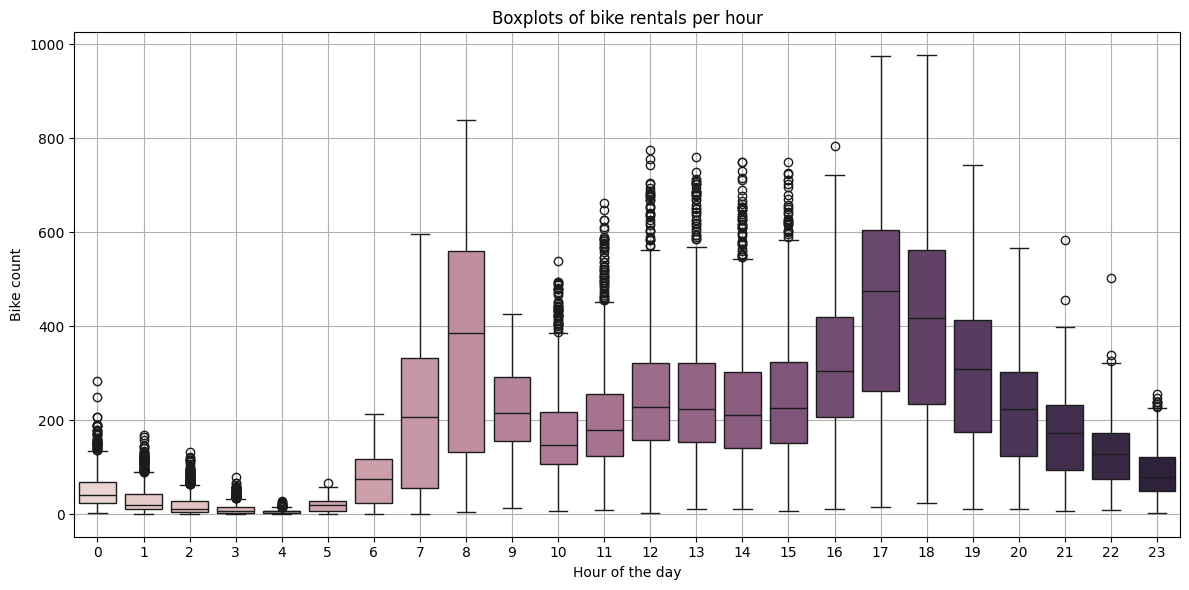

In [ ]:
# boxplot of average count by hour of the day
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='hr', y='cnt_original', data=df, hue = 'hr', legend=False)
plt.title('Boxplots of bike rentals per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Bike count')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In one of the iterations, I decided to create new features: 'is rush hour' and 'is night,' both of them are binary features. More details about the iterations and the reasoning behind these are explained later.

In [ ]:
rush_hour_hours = [7, 8, 9, 15, 16, 17, 18, 19]  # morning and evening rush hours
df['is_rush_hour'] = df['hr'].apply(lambda x: 1 if x in rush_hour_hours else 0)

night_hours = [0, 1, 2, 3, 4, 5]  # night hours
df['is_night'] = df['hr'].apply(lambda x: 1 if x in night_hours else 0)

### Weekday = weekday

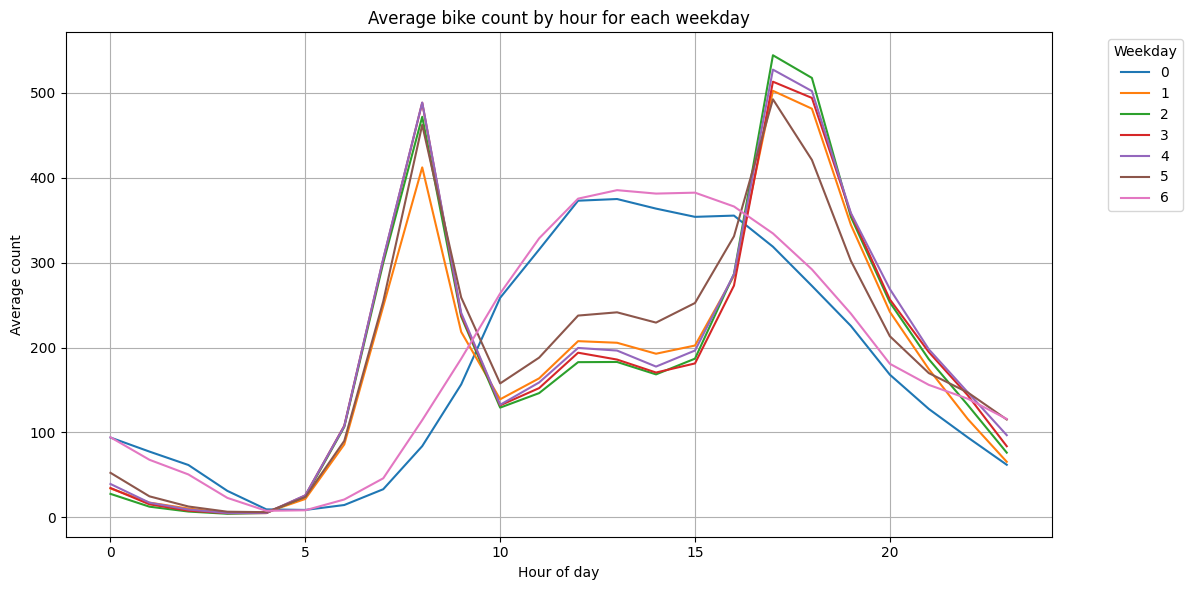

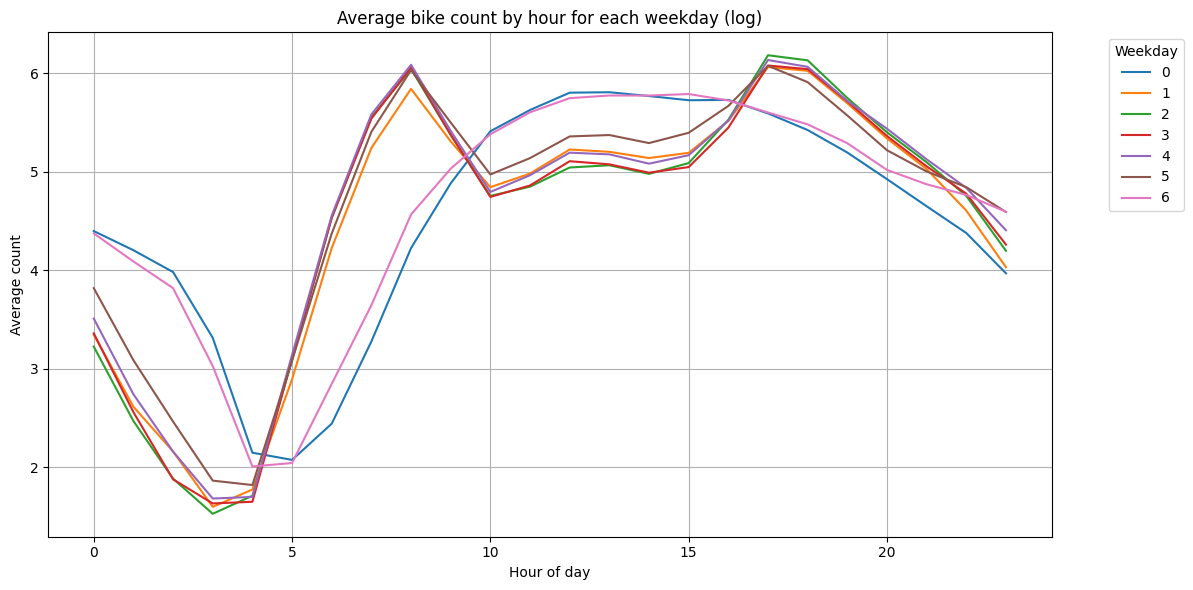

In [ ]:
# average count by weekday
grouped = df.groupby(['weekday', 'hr'])['cnt_original'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='hr', y='cnt_original', hue='weekday', palette='tab10')

plt.title('Average bike count by hour for each weekday')
plt.xlabel('Hour of day')
plt.ylabel('Average count')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# average count by weekday (log)
grouped = df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='hr', y='cnt', hue='weekday', palette='tab10')

plt.title('Average bike count by hour for each weekday (log)')
plt.xlabel('Hour of day')
plt.ylabel('Average count (log)')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the plot, we can see two distinct lines with different shapes. The first group corresponds to weekdays (1-5), and the second group corresponds to weekends (6 and 0). This suggests that there is a significant difference in bike rentals between weekdays and weekends, which may be due to variations in demand for bike rentals on these days. It might be useful to create a feature that combines weekday and weekend data, such as a binary feature indicating whether the day is a weekday or a weekend. This could help simplify the analysis and make the results easier to interpret.


In the log plot, this pattern is still visible, but the difference between weekdays and weekends is less pronounced.

[Text(0.5, 1.0, 'Count of bikes during different days')]

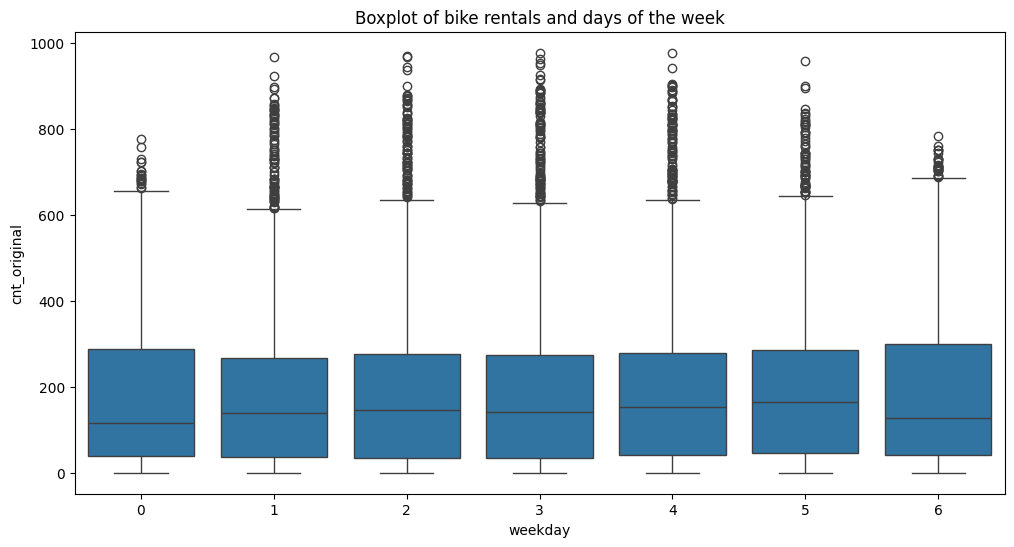

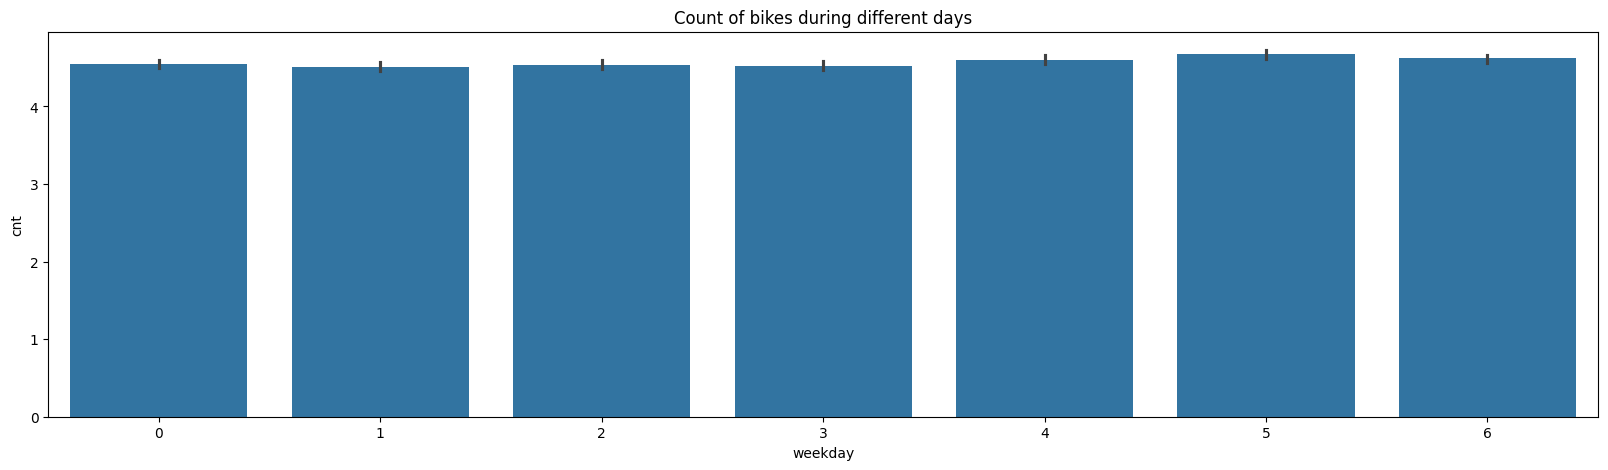

In [ ]:
# boxplot of average count by weekday
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt_original', data=df)
plt.title('Boxplot of bike rentals and days of the week')

# boxplot of average count by weekday (log)
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Boxplot of bike rentals and days of the week (log)')

We can see that the boxplots are very similar, with the exception of the weekends (0 and 6), where there are fewer entries outside the 1.5 IQR. This suggests that the data is more concentrated around the mean and median on weekends, making these days more predictable.

[Text(0.5, 1.0, 'Count of bikes during different days')]

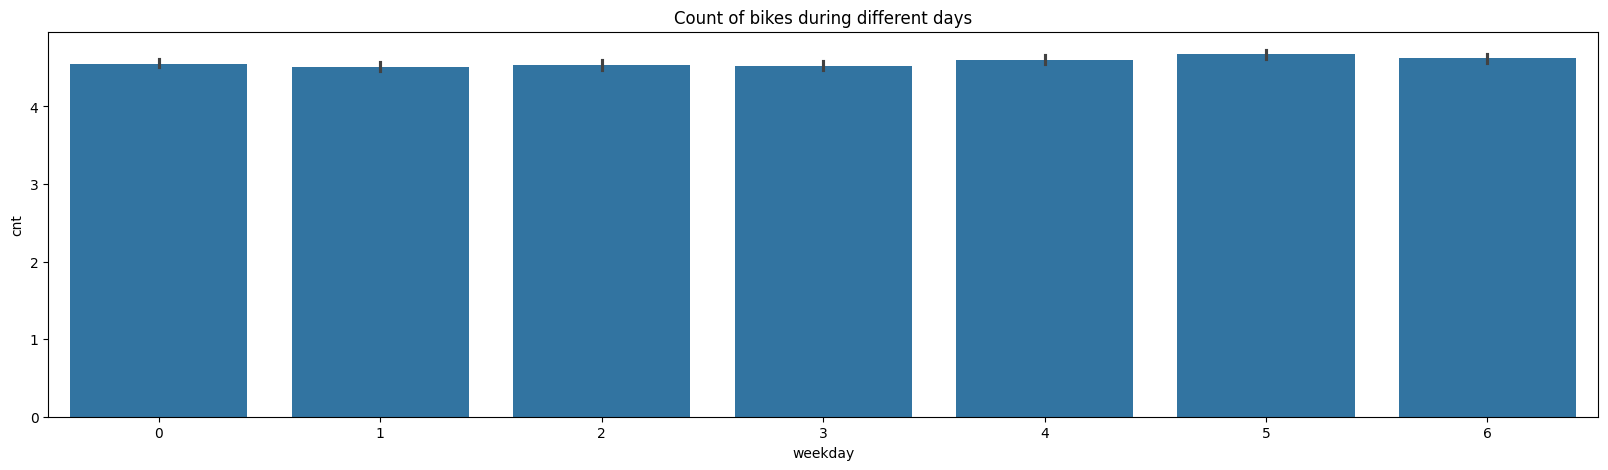

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

Once we apply the log transformation the count of it is almost equal for almost all weekdays.

## Binary features
- holiday
- workingday

### Holiday = holiday

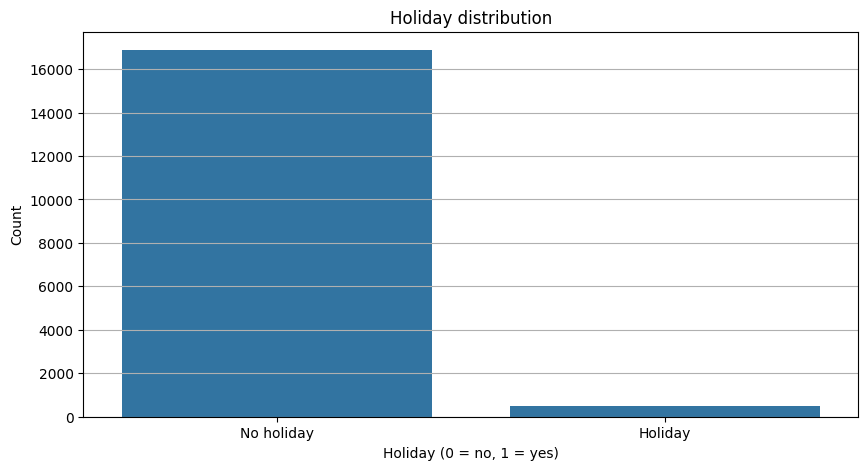

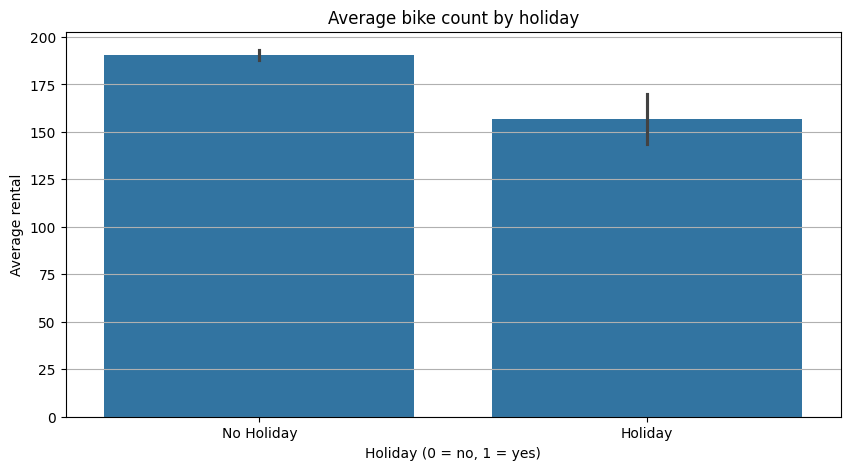

In [ ]:
# total count by holiday
plt.figure(figsize=(10, 5))
sns.countplot(x='holiday', data=df)
plt.title('Holiday distribution')
plt.xlabel('Holiday (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No holiday', 'Holiday'])
plt.grid(True, axis='y')
plt.show()

# average count by holiday
plt.figure(figsize=(10, 5))
sns.barplot(x='holiday', y='cnt_original', data=df)
plt.title('Average bike count by holiday')
plt.xlabel('Holiday (0 = no, 1 = yes)')
plt.ylabel('Average rental')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.grid(True, axis='y')
plt.show()

There is less rental activity on holiday days compared to non-holiday days. 

### Workingday = workingday

This feature is a binary feature that I proposed earlier, but it is already present in the dataset. It might be highly correlated with the weekday feature, as the distribution for working days is very similar and the distribution for weekend days is also quite similar.

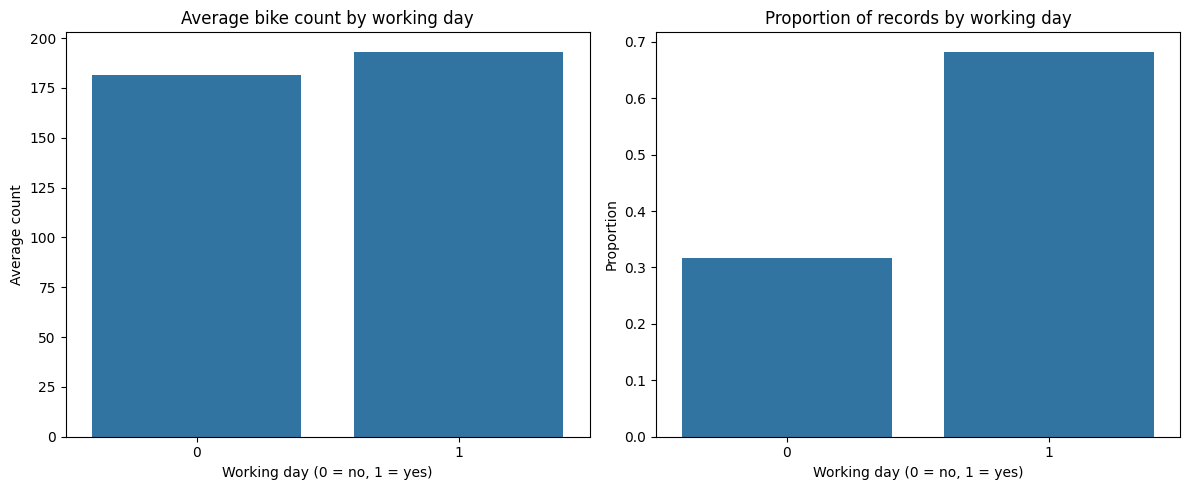

In [ ]:
# average count by working day and proportion of records
avg_cnt = df.groupby('workingday')['cnt_original'].mean().reset_index()
proportion = df['workingday'].value_counts(normalize=True).sort_index().reset_index()
proportion.columns = ['workingday', 'proportion']
summary = avg_cnt.merge(proportion, on='workingday')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='workingday', y='cnt_original', data=avg_cnt, ax=axs[0])
axs[0].set_title('Average bike count by working day')
axs[0].set_xlabel('Working day (0 = no, 1 = yes)')
axs[0].set_ylabel('Average count')

sns.barplot(x='workingday', y='proportion', data=proportion, ax=axs[1])
axs[1].set_title('Proportion of records by working day')
axs[1].set_xlabel('Working day (0 = no, 1 = yes)')
axs[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Based on the left graph, on average there are more rentals on weekdays.

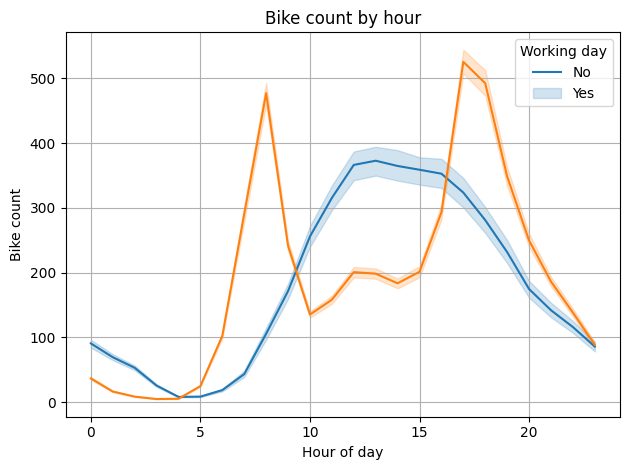

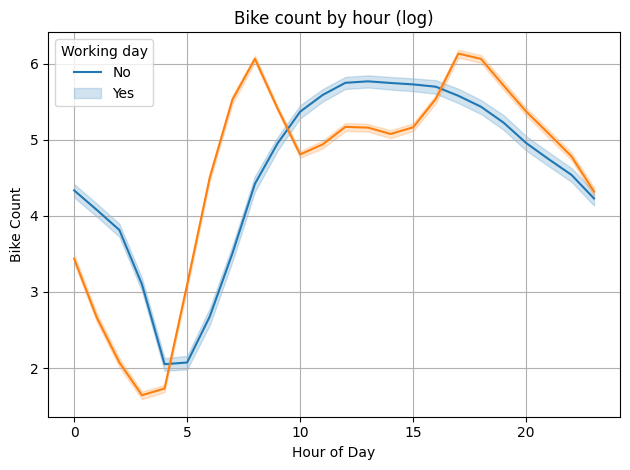

In [ ]:
# average count by working day and hour
sns.lineplot(data=df, x='hr', y='cnt_original', hue='workingday')
plt.title('Bike count by hour')
plt.xlabel('Hour of day')
plt.ylabel('Bike count')
plt.legend(title='Working day', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()

# average count by working day and hour (log)
sns.lineplot(data=df, x='hr', y='cnt', hue='workingday')
plt.title('Bike count by hour (log)')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Count')
plt.legend(title='Working day', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Weather features
- Categorical:
    - weathersit
- Numerical:
    - temp
    - atemp
    - hum
    - windspeed

### Categorical: Weather situation = weathersit

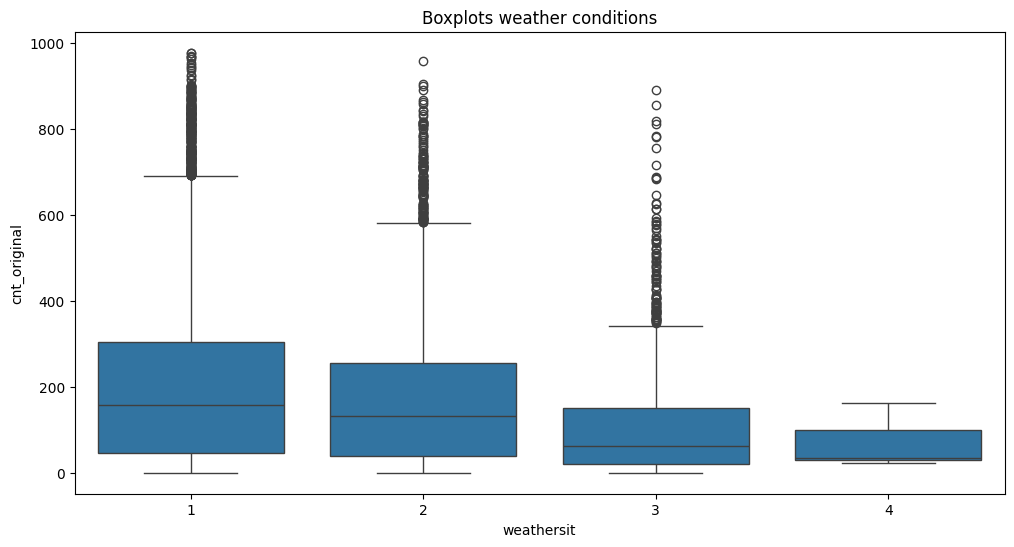

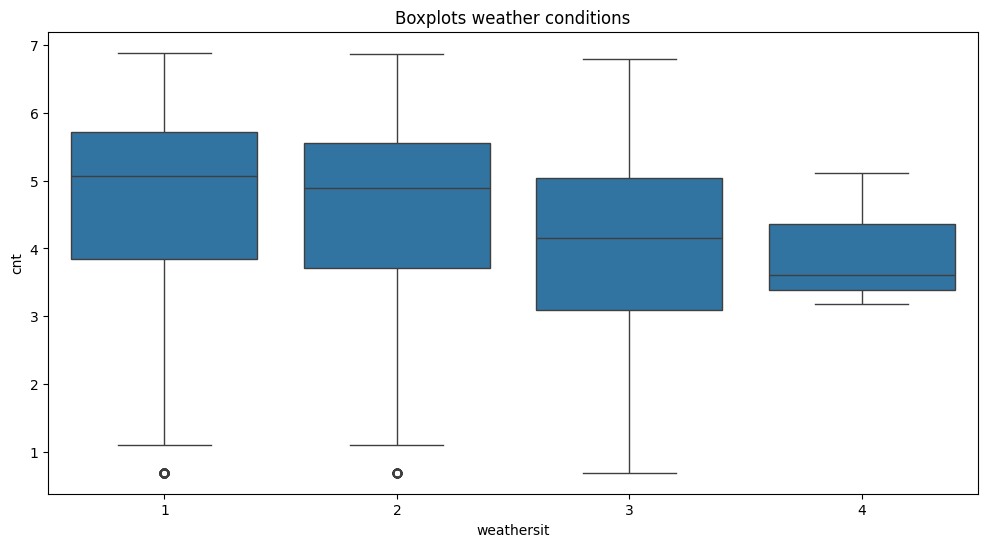

In [ ]:
# boxplot count by weather conditions
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt_original', data=df)
plt.title('Boxplots weather conditions')
plt.show()

# boxplot count by weather conditions (log)
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Boxplots weather conditions (log)')
plt.show()

This categorical feature is not going to be encoded. As the value of this feature is higher, we can see that there is a decrease in the number of rentals. That why we want to keep the hierarchy of the values, and not encode them. Once we apply the log transformation we still can see this relation

[Text(0.5, 1.0, 'Count during different weathers')]

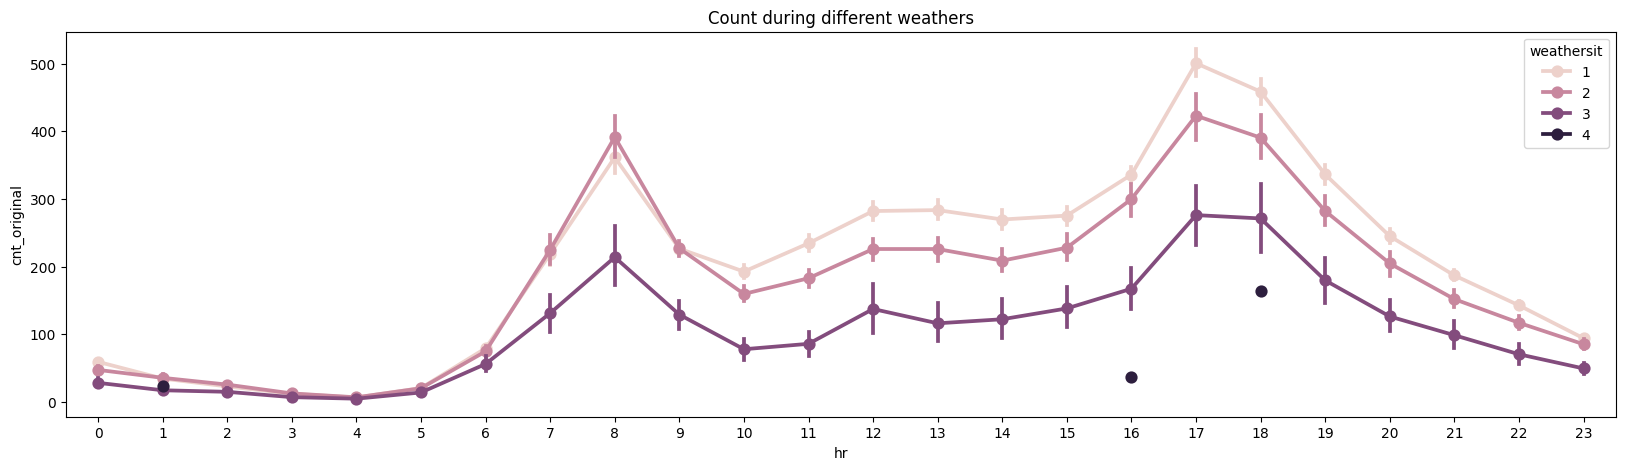

In [ ]:
# count by weather conditions and hour
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt_original', hue='weathersit', ax = ax)
ax.set(title='Count during different weathers')

### Numerical

#### Temperature = temp

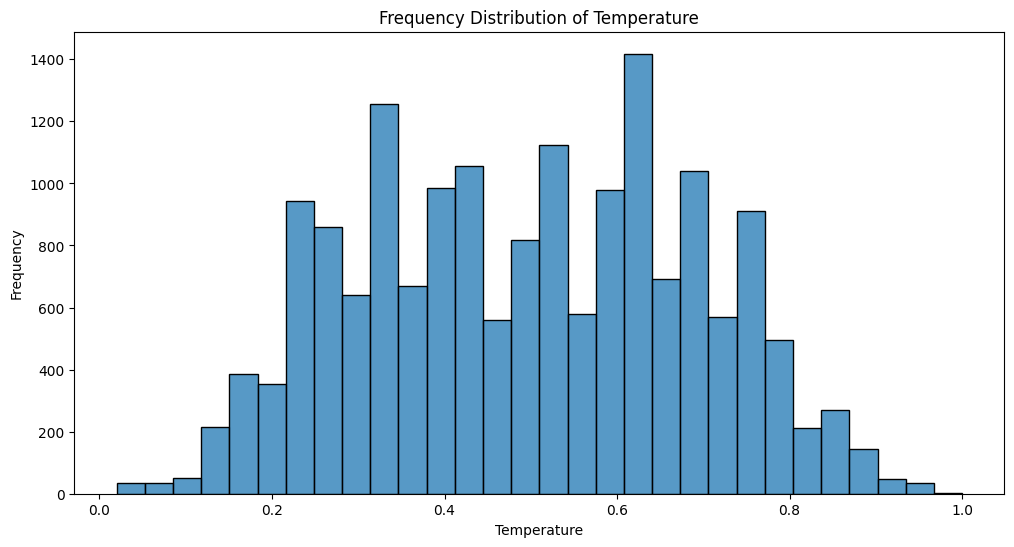

In [ ]:
# distribution of temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['temp'], bins=30, kde=False)  
plt.title('Frequency Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


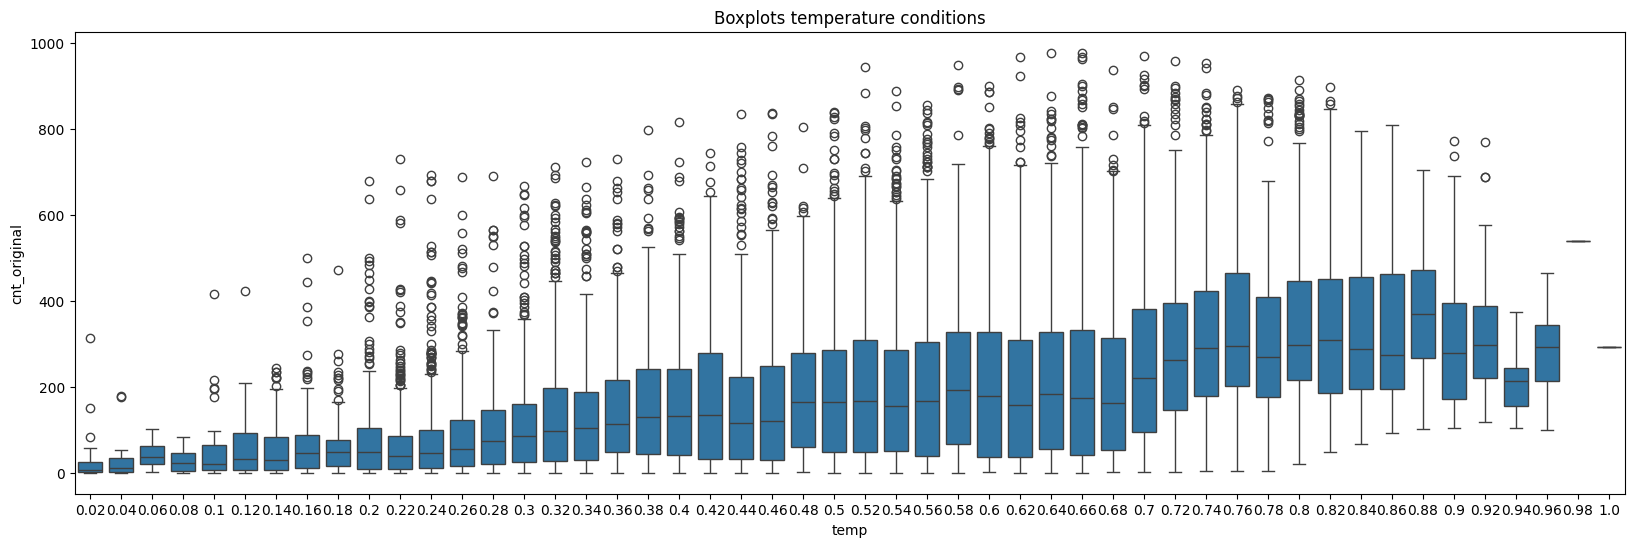

In [ ]:
# boxplot of count based on temperature
plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='cnt_original', data=df)
plt.title('Boxplots temperature conditions')
plt.show()

There is a day which the perceived temperature was 50 degrees, which is a really high value. Lets check if it was an error or not.

In [ ]:
atemp_outlier_rows = df[df['atemp'] == 1]
print(atemp_outlier_rows)

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
4768     4769  2011-07-22       3   0     7  14        0        5           1   

      weathersit  temp  atemp   hum  windspeed  casual  registered       cnt  \
4768           1  0.96    1.0  0.48     0.2985      24          77  4.624973   

      cnt_original  is_rush_hour  is_night  
4768           101             0         0  


The real temperature that day was around 40 degrees, taking into account that it was july and 2pm, with a 40% humidity. So this value is not an error, but it is a really high value.

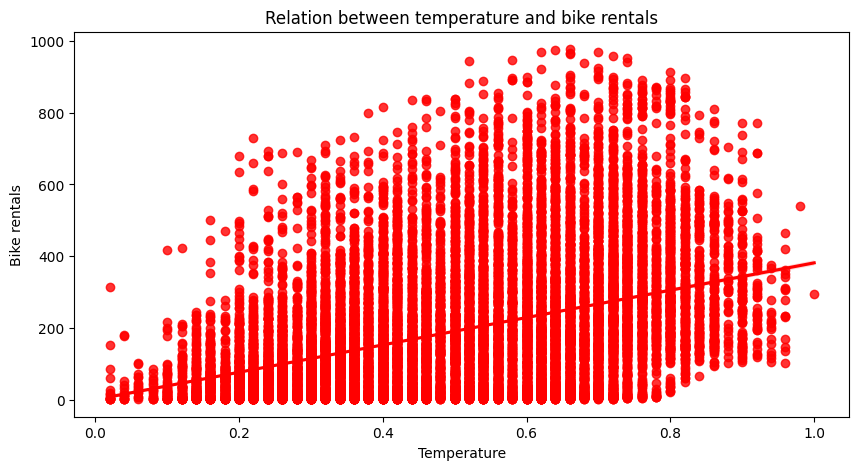

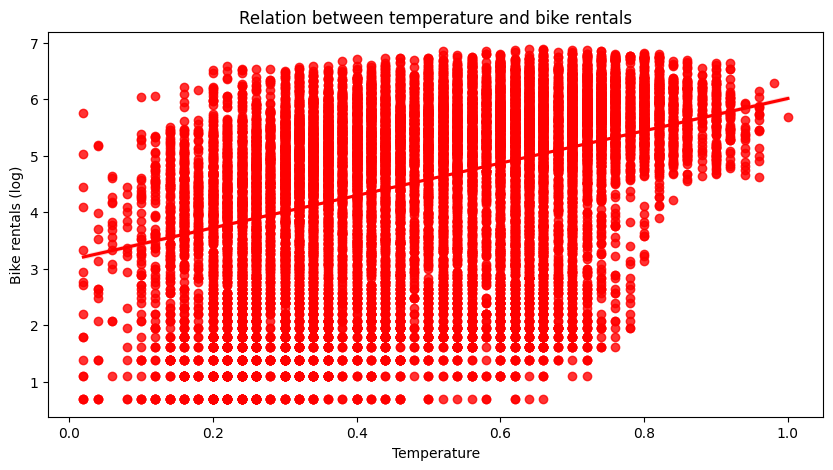

In [ ]:
# count based on temperature
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt_original', data=df, color='red')
plt.title('Relation between temperature and bike rentals')
plt.xlabel('Temperature')
plt.ylabel('Bike rentals')
plt.show()

# count based on temperature (log)
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt', data=df, color='red')
plt.title('Relation between temperature and bike rentals (log)')
plt.xlabel('Temperature')
plt.ylabel('Bike rentals (log)')
plt.show()

We know there is a direct relationship between temperature and bike rentals, as people are more likely to rent bikes in warmer weather. 

#### Perceived temperature = atemp

We expect this feature to be similar to the temperature feature, since it is a measure of how hot or cold people feel.

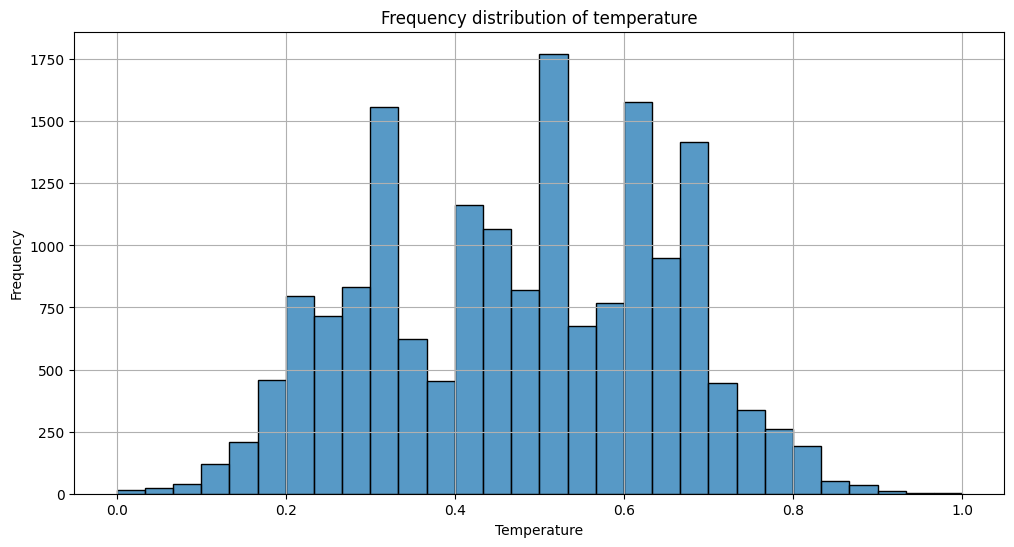

In [122]:
# distribution of atemp
plt.figure(figsize=(12, 6))
sns.histplot(df['atemp'], bins=30)  
plt.title('Frequency distribution of temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

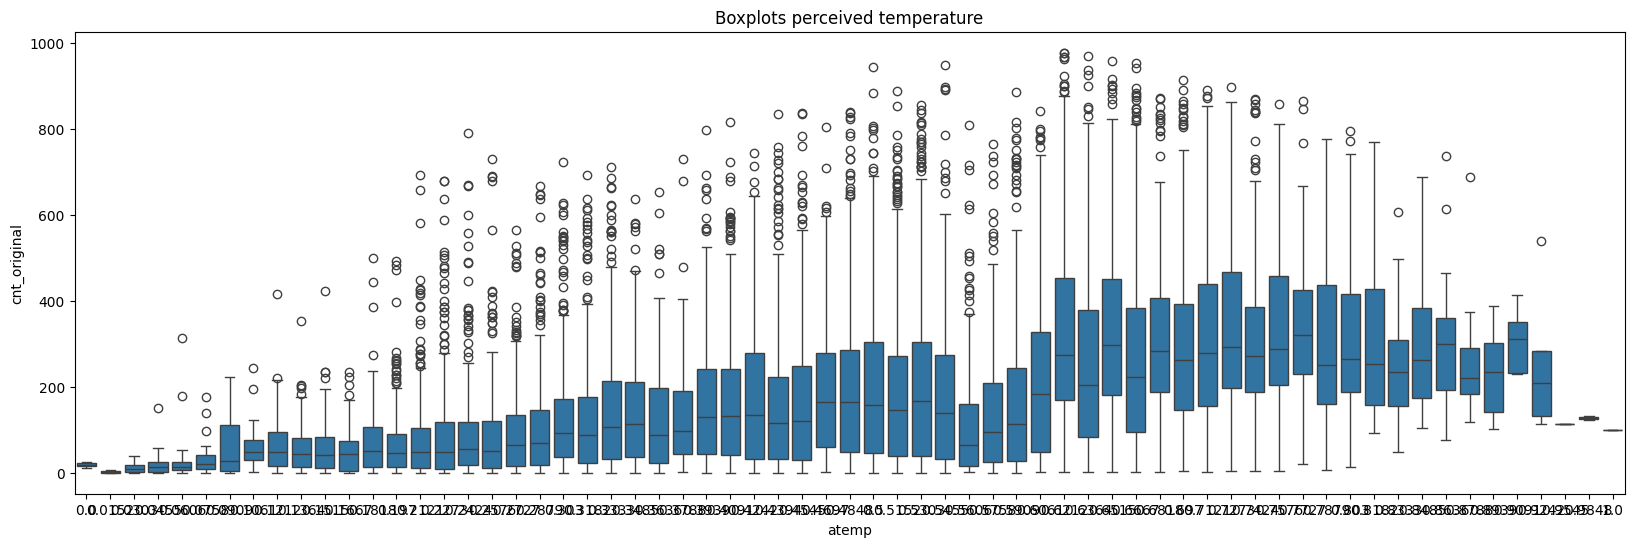

In [ ]:
# boxplot of count based on atemp
plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='cnt_original', data=df)
plt.title('Boxplots perceived temperature')
plt.show()

One day the perceived temperature was 50 degrees.

In [ ]:
df['atemp'].max()

np.float64(1.0)

#### Wind speed = windspeed

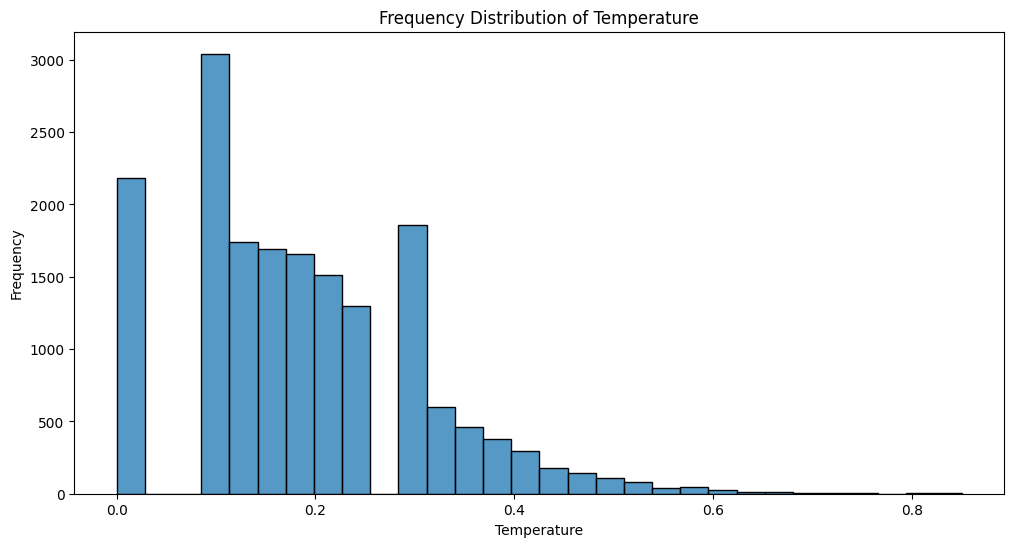

In [ ]:
# distribution of windspeed
plt.figure(figsize=(12, 6))
sns.histplot(df['windspeed'], bins=30, kde=False)  
plt.title('Frequency distribution of windspeed')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

We can see it is right skewed

In [ ]:
df['windspeed'].max()


np.float64(0.8507)

In [ ]:
df['windspeed'].min()

np.float64(0.0)

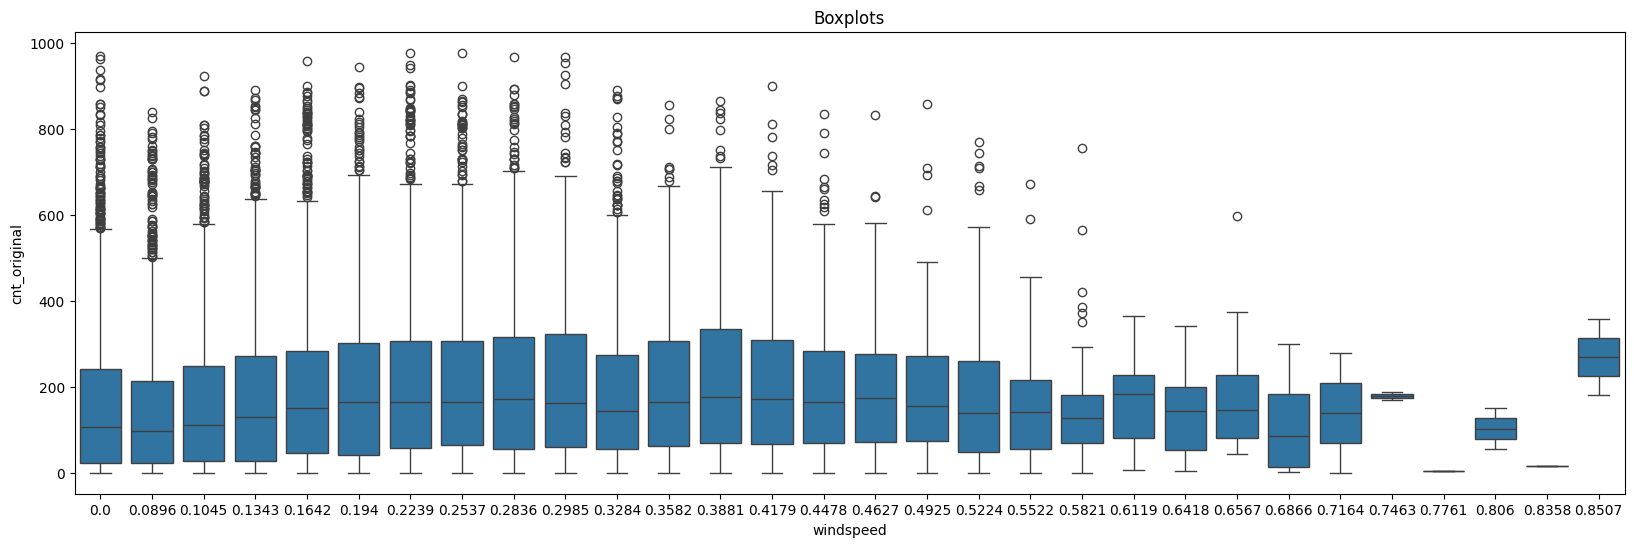

In [ ]:
# boxplot of count based on windspeed
plt.figure(figsize=(20,6))
sns.boxplot(x='windspeed', y='cnt_original', data=df)
plt.title('Boxplots')
plt.show()

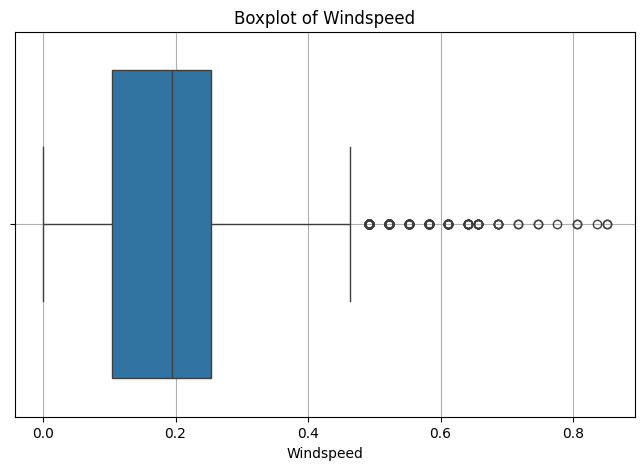

In [ ]:
# boxplot of windspeed
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['windspeed'])
plt.title('Boxplot of windspeed')
plt.xlabel('Windspeed')
plt.grid(True)
plt.show()

We can see there are some values really big compared to the rest.

In [ ]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['windspeed'] < lower_bound) | (df['windspeed'] > upper_bound)]

season_counts = outliers['season'].value_counts().sort_index()
print('Outliers per season:\n', season_counts)

day_counts = outliers['dteday'].value_counts()
same_day_outliers = day_counts[day_counts > 1]
print('\nDays with multiple windspeed outliers:\n', same_day_outliers)


Outliers per season:
 season
1    174
2     87
3     36
4     45
Name: count, dtype: int64

Days with multiple windspeed outliers:
 dteday
2011-02-19    15
2012-03-26     9
2011-02-14     8
2012-01-18     8
2012-03-09     8
              ..
2011-07-03     2
2011-05-05     2
2011-04-12     2
2011-03-06     2
2011-02-18     2
Name: count, Length: 80, dtype: int64


These 340 values are outliers, but I am not going to remove them, since they are not errors or anomalies, but rather represent extreme weather conditions. The majority happen in winter, and usually within the same day we find more than 1 outlier.

#### Humidity = hum

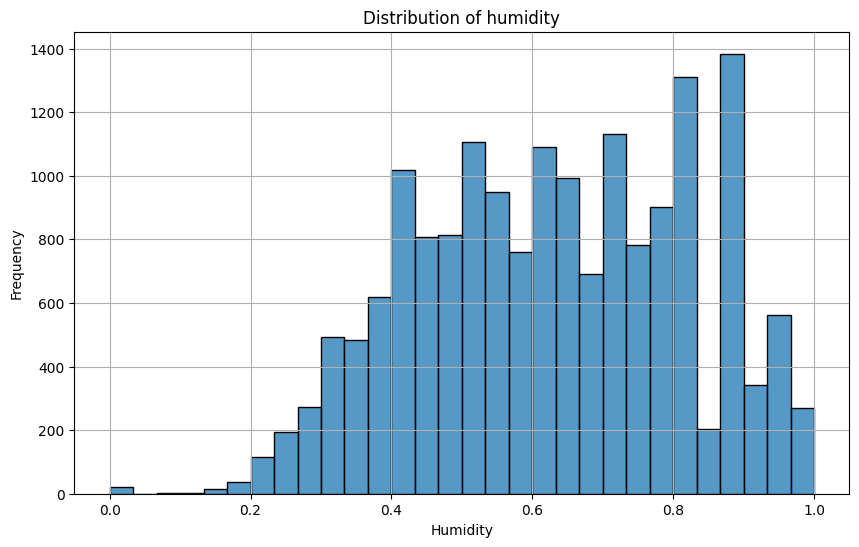

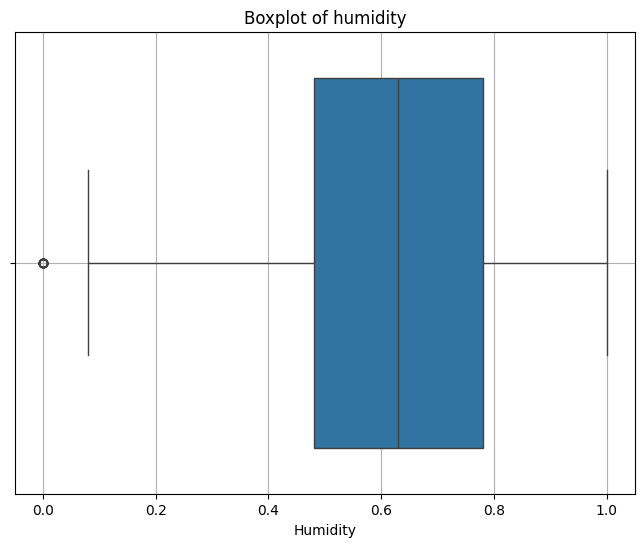

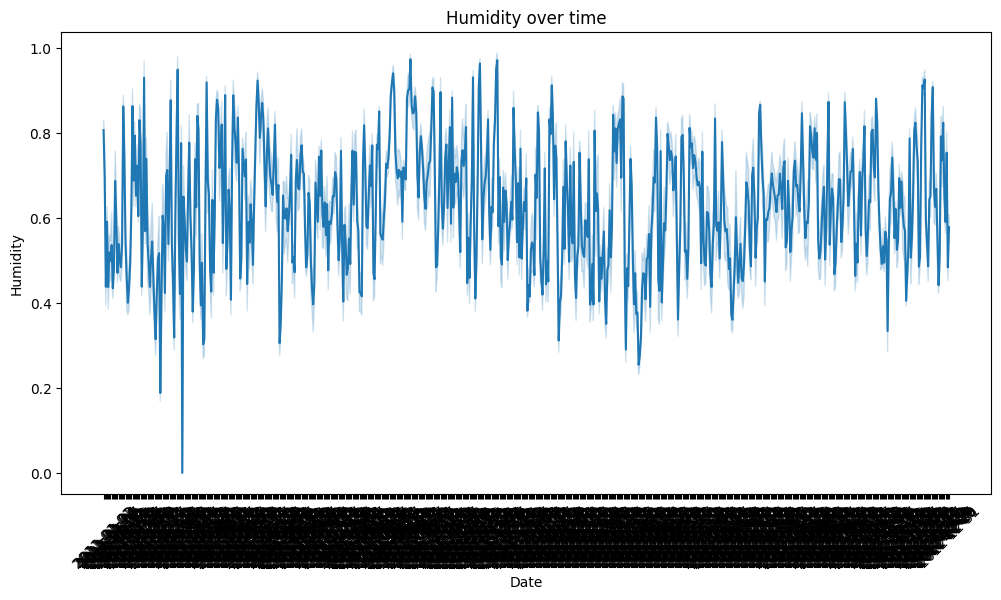

In [ ]:
# distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['hum'], bins=30, kde=False)
plt.title('Distribution of humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# boxplot of humidity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['hum'])
plt.title('Boxplot of humidity')
plt.xlabel('Humidity')
plt.grid(True)
plt.show()

# humidity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='hum', data=df)
plt.title('Humidity over time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.show()


##### Outliers

We can see that there is a humidity value of 0%, which is impossible. Humidity near 100% is possible during very foggy conditions, but it doesn't typically persist for long periods. To address the 0% humidity value, we'll find a new value for the entry with 0% humidity.

In [ ]:
indices_hum_cero = df[(df['hum'] <= 0.1) & (df['hum'] >= 0)].index.tolist()
print(f"We found {len(indices_hum_cero)} entries with humidity = 0")

We found 24 entries with humidity = 0


We will replace them by taking the average of other values with the same season, year, hour, and similar temperature (+ 5 and - 5 degrees)

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])


for idx in indices_hum_cero:
    current_date = df.iloc[idx]['dteday']
    current_hour = df.iloc[idx]['hr']
    current_season = df.iloc[idx]['season']
    current_year = df.iloc[idx]['yr']
    current_temp = df.iloc[idx]['temp']
    
    similar_entries = df[(df['season'] == current_season) & 
                         (df['yr'] == current_year) & 
                         (df['hr'] == current_hour) &
                         (df['temp'] >= current_temp - 5) &
                         (df['temp'] <= current_temp + 5) &
                         (df.index != idx)] 

    mean_humidity = similar_entries['hum'].mean() if not similar_entries.empty else None
    
    if mean_humidity is not None:
        df.at[idx, 'hum'] = mean_humidity

    print(f"Index {idx}:")
    print(f"Mean of the humidity: {mean_humidity}")



Index 1108:
Mean of the humidity: 0.6047727272727272
Index 1109:
Mean of the humidity: 0.6143181818181819
Index 1551:
Mean of the humidity: 0.6286046511627906
Index 1552:
Mean of the humidity: 0.6406976744186047
Index 1553:
Mean of the humidity: 0.6435443037974684
Index 1554:
Mean of the humidity: 0.66
Index 1555:
Mean of the humidity: 0.6658139534883721
Index 1556:
Mean of the humidity: 0.6695402298850573
Index 1557:
Mean of the humidity: 0.6612643678160921
Index 1558:
Mean of the humidity: 0.6290804597701148
Index 1559:
Mean of the humidity: 0.5887356321839081
Index 1560:
Mean of the humidity: 0.5450574712643679
Index 1561:
Mean of the humidity: 0.5087499999999999
Index 1562:
Mean of the humidity: 0.4932954545454546
Index 1563:
Mean of the humidity: 0.47431818181818175
Index 1564:
Mean of the humidity: 0.4689772727272727
Index 1565:
Mean of the humidity: 0.4798876404494382
Index 1566:
Mean of the humidity: 0.4896629213483146
Index 1567:
Mean of the humidity: 0.5132954545454546
Index 

All of this features found themselves in the first part of the dataset, meaning that we are working with a section from the beginning, not interfering witht the rest of the data. This is important becouse we dont want data leakage.

## Other features
- instant
- casual
- registered

Both casual and registered can be considered as potential data leakage since their sum equals cnt. They essentially represent the division of cnt into two groups, so we can drop them from the dataset. Additionally, instant is just an index and does not provide any useful information.

In [ ]:
df.drop(columns=['instant', 'casual', 'registered'], inplace=True)

In [ ]:
df.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1   0        0        6           0           1   
1 2011-01-01       1   0     1   1        0        6           0           1   
2 2011-01-01       1   0     1   2        0        6           0           1   
3 2011-01-01       1   0     1   3        0        6           0           1   
4 2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed       cnt  cnt_original  is_rush_hour  \
0  0.24  0.2879  0.81        0.0  2.833213            16             0   
1  0.22  0.2727  0.80        0.0  3.713572            40             0   
2  0.22  0.2727  0.80        0.0  3.496508            32             0   
3  0.24  0.2879  0.75        0.0  2.639057            13             0   
4  0.24  0.2879  0.75        0.0  0.693147             1             0   

   is_night  
0         1  
1         1  
2         1  
3         1  
4         1

## Interactions

### Temp - Atemp

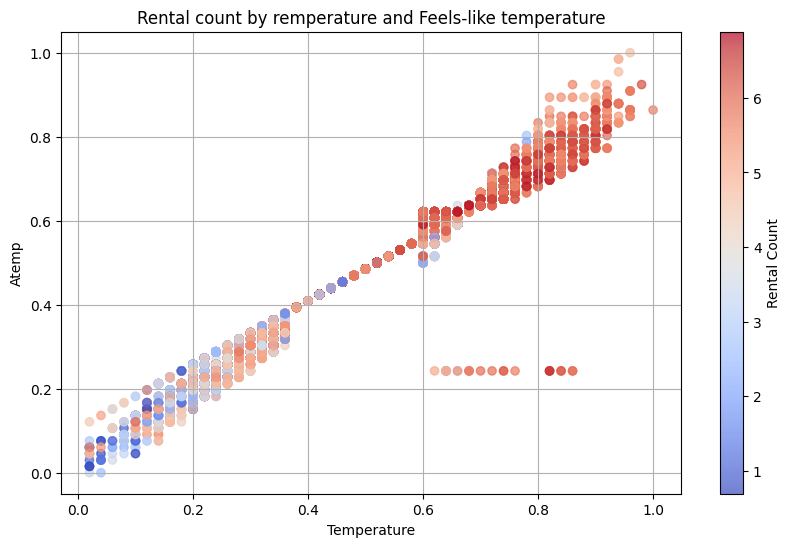

In [ ]:
# rental count (log) based on temp and atemp
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['temp'], df['atemp'],
    c=df['cnt'], cmap='coolwarm', alpha=0.7
)
plt.colorbar(scatter, label='Rental Count')
plt.xlabel('Temperature')
plt.ylabel('Atemp')
plt.title('Rental count by remperature and Feels-like temperature')
plt.grid(True)
plt.show()


This interaction term may initially seem unimportant, but it became one of the most significant and useful features in the model. My hypothesis behind it is that while temp represents the measured temperature, atemp accounts for additional factors like humidity and wind. High values in both might indicate hot, uncomfortable weather. This interaction term captures combined effects that the individual temperature feature cannot, improving the model’s prediction of bike rentals.

### hr - temp

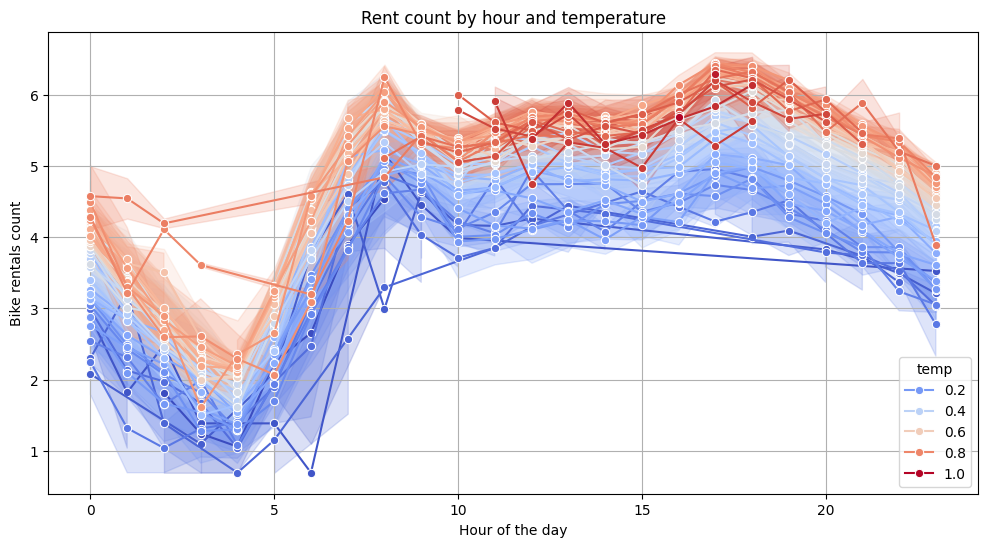

In [ ]:
# count (log) based hour and temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='temp', data=df, palette="coolwarm", marker="o")
plt.title('Rent count by hour and temperature')
plt.xlabel('Hour of the day')
plt.ylabel('Bike rentals count')
plt.grid(True)
plt.show()

As we can see in the plot the interaction between hour and temp is likely important because temperature varies throughout the day, influencing bike rental demand. For instance, people are more likely to rent bikes during warmer hours, especially in the afternoon when temperatures rise

### hum - temp

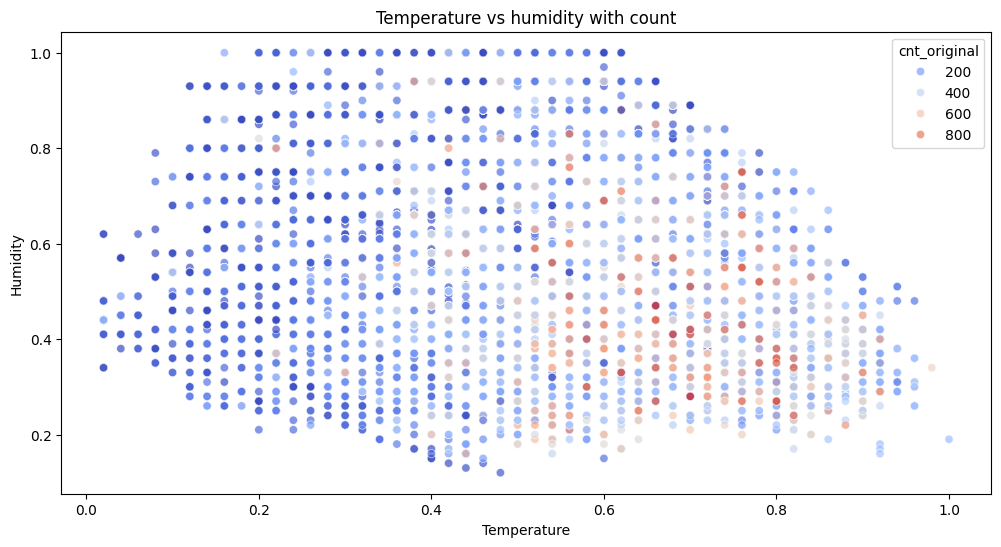

In [ ]:
# count based on temp and humidity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='hum', hue='cnt_original', data=df, palette="coolwarm", alpha=0.7)
plt.title('Temperature vs humidity with count')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

The interaction term between temperature and humidity is important because both factors together influence people's decision to rent bikes. 

# Task 2: Data Splitting
Lecture Material: Lecture 8 (slide 4), Lecture 12 (slides 4–5)

- Split the dataset into: Training set (60%), Validation set (20%), Test set (20%). If necessary, reevaluate these percentages when tuning the model.
- Use a random split while preserving temporal order if possible.
- Apply the split before performing any feature engineering or scaling to avoid leakage. 

In this section, I am splitting the data by time order to avoid data leakage and keep the timeline intact, preventing data leakage. There is the risk of seasonal or temporal bias, but since our data covers two years and includes a lot of data points, and with such a large dataset, we can reasonably assume it captures the full range of trends and patterns, which helps reduce the risk of bias.

In [ ]:
from sklearn.model_selection import train_test_split

df = df.sort_values("dteday").reset_index(drop=True)
df.drop(columns=['dteday'], inplace=True)

train_df, temp_df = train_test_split(df, train_size=0.6, shuffle=False)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=False)

print(f"Training Set: {len(train_df)} rows")
print(f"Validation Set: {len(valid_df)} rows")
print(f"Test Set: {len(test_df)} rows")

Training Set: 10427 rows
Validation Set: 3476 rows
Test Set: 3476 rows


Starting from here we are dividing the pipeline into 3 parts. 

In [ ]:
train_lr = train_df.copy()
valid_lr = valid_df.copy()
test_lr = test_df.copy()

train_rf = train_df.copy()
valid_rf = valid_df.copy()
test_rf = test_df.copy()

train_xgb = train_df.copy()
valid_xgb = valid_df.copy()
test_xgb = test_df.copy()

# Linear Regression

My plan on linear regression is to perform a really basic model, just to see how it performs and to have a baseline to compare with the other models. I will add everything asked on the task and log transform the target variable.

## Task 3: Feature Engineering for Linear Regression
Lecture Material: Lecture 9 (slides 2–8), Lecture 12 (slides 4–9)
- Encode cyclical features (hr, weekday) using sine and cosine transforms.
- One-hot encode categorical variables: season, weathersit, and mnth.
- Apply scaling (e.g., StandardScaler) to continuous features: temp, atemp, hum, and windspeed.
- Fit all transformations using only the training set, and apply them to validation and test sets.
- Consider interaction terms such as temp × humidity if they are justified by EDA.
- Remove leaky or redundant features (e.g., atemp if highly collinear with temp).

### 3.1 Interaction terms 

The commented code was code from previous iterations

In [ ]:
train_lr['temp_atemp_interaction'] = train_lr['temp'] * train_lr['atemp']
# train_lr['temp_hour_interaction'] = train_lr['temp'] * train_lr['hr']
# train_lr['temp_hum_interaction'] = train_lr['temp'] * train_lr['hum']

valid_lr['temp_atemp_interaction'] = valid_lr['temp'] * valid_lr['atemp']
# valid_lr['temp_hum_interaction'] = valid_lr['temp'] * valid_lr['hum']
# valid_lr['temp_hour_interaction'] = valid_lr['temp'] * valid_lr['hr']

test_lr['temp_atemp_interaction'] = test_lr['temp'] * test_lr['atemp']
#test_lr['temp_hum_interaction'] = test_lr['temp'] * test_lr['hum']
#test_lr['temp_hour_interaction'] = test_lr['temp'] * test_lr['hr']

### 3.2 Encode cyclical features

In [ ]:
def encode_cyclical(df):
    df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
    df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

    df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
    df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

    df = df.drop(columns=["hr", "weekday"])
    
    return df

train_lr = encode_cyclical(train_lr)
valid_lr = encode_cyclical(valid_lr)
test_lr = encode_cyclical(test_lr)

print(train_lr.head())
print(valid_lr.head())
print(test_lr.head()) 

   season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1        0           0           1  0.24  0.2879  0.81   
1       1   0     1        0           0           2  0.46  0.4545  0.88   
2       1   0     1        0           0           2  0.40  0.4091  0.94   
3       1   0     1        0           0           2  0.40  0.4091  0.87   
4       1   0     1        0           0           2  0.40  0.4091  0.87   

   windspeed       cnt  cnt_original  is_rush_hour  is_night  \
0     0.0000  2.833213            16             0         1   
1     0.2985  3.688879            39             0         0   
2     0.2239  3.367296            28             0         0   
3     0.1940  3.555348            34             0         0   
4     0.2537  3.610918            36             0         0   

   temp_atemp_interaction    hr_sin    hr_cos  weekday_sin  weekday_cos  
0                0.069096  0.000000  1.000000    -0.781831      0.62349  
1         

### 3.2 One hot encoding

Weathesit is not going to be encoded as it shows a hierarchy between the values.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["season", "mnth"]

encoder = OneHotEncoder(drop="first", sparse_output=False)

# encoding
train_encoded = encoder.fit_transform(train_lr[categorical_features])
valid_encoded = encoder.transform(valid_lr[categorical_features])
test_encoded = encoder.transform(test_lr[categorical_features])

# remaking the df
encoded_columns = encoder.get_feature_names_out(categorical_features)
train_encoded_lr = pd.DataFrame(train_encoded, columns=encoded_columns, index=train_lr.index)
valid_encoded_lr = pd.DataFrame(valid_encoded, columns=encoded_columns, index=valid_lr.index)
test_encoded_lr = pd.DataFrame(test_encoded, columns=encoded_columns, index=test_lr.index)

# concatenate
train_lr = pd.concat([train_lr.drop(columns=categorical_features), train_encoded_lr], axis=1)
valid_lr = pd.concat([valid_lr.drop(columns=categorical_features), valid_encoded_lr], axis=1)
test_lr = pd.concat([test_lr.drop(columns=categorical_features), test_encoded_lr], axis=1)

print(train_lr.head())
print(valid_lr.head())
print(test_lr.head())


   yr  holiday  workingday  weathersit  temp   atemp   hum  windspeed  \
0   0        0           0           1  0.24  0.2879  0.81     0.0000   
1   0        0           0           2  0.46  0.4545  0.88     0.2985   
2   0        0           0           2  0.40  0.4091  0.94     0.2239   
3   0        0           0           2  0.40  0.4091  0.87     0.1940   
4   0        0           0           2  0.40  0.4091  0.87     0.2537   

        cnt  cnt_original  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  \
0  2.833213            16  ...     0.0     0.0     0.0     0.0     0.0   
1  3.688879            39  ...     0.0     0.0     0.0     0.0     0.0   
2  3.367296            28  ...     0.0     0.0     0.0     0.0     0.0   
3  3.555348            34  ...     0.0     0.0     0.0     0.0     0.0   
4  3.610918            36  ...     0.0     0.0     0.0     0.0     0.0   

   mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  
0     0.0     0.0      0.0      0.0      0.0  
1     0.0     0.0     

### 3.3 Scaling

In [ ]:
continuous_features = ["temp", "atemp", "hum", "windspeed"]

# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_df[continuous_features])

train_lr[continuous_features] = scaler.transform(train_lr[continuous_features])
valid_lr[continuous_features] = scaler.transform(valid_lr[continuous_features])
test_lr[continuous_features] = scaler.transform(test_lr[continuous_features])

# verify
print('Train set after scaling:')
print(train_lr[continuous_features].head())

print('\nValidation set after scaling:')
print(valid_lr[continuous_features].head())

print('\nTest set after scaling:')
print(test_lr[continuous_features].head())

Train set after scaling:
       temp     atemp       hum  windspeed
0 -1.113265 -0.873137  0.910999  -1.557673
1  0.000903  0.066143  1.268879   0.817807
2 -0.302961 -0.189819  1.575634   0.224136
3 -0.302961 -0.189819  1.217753  -0.013810
4 -0.302961 -0.189819  1.217753   0.461286

Validation set after scaling:
           temp     atemp       hum  windspeed
10427  0.203479  0.236972 -0.213769  -0.726056
10428  0.203479  0.236972 -0.213769  -1.557673
10429  0.203479  0.236972 -0.009266  -1.557673
10430 -0.100385 -0.018990  0.706495  -0.726056
10431  0.507343  0.493498 -0.162643  -0.488906

Test set after scaling:
           temp     atemp       hum  windspeed
13903  1.418935  1.433342  0.348615  -0.488906
13904  1.216359  1.262513  1.064376  -0.013810
13905  1.216359  1.262513  1.064376  -0.488906
13906  1.216359  1.262513  1.064376  -0.488906
13907  1.216359  1.262513  1.064376  -1.557673


### 3.6 Feature Selection: Remove leaky or redundant features 

<Axes: >

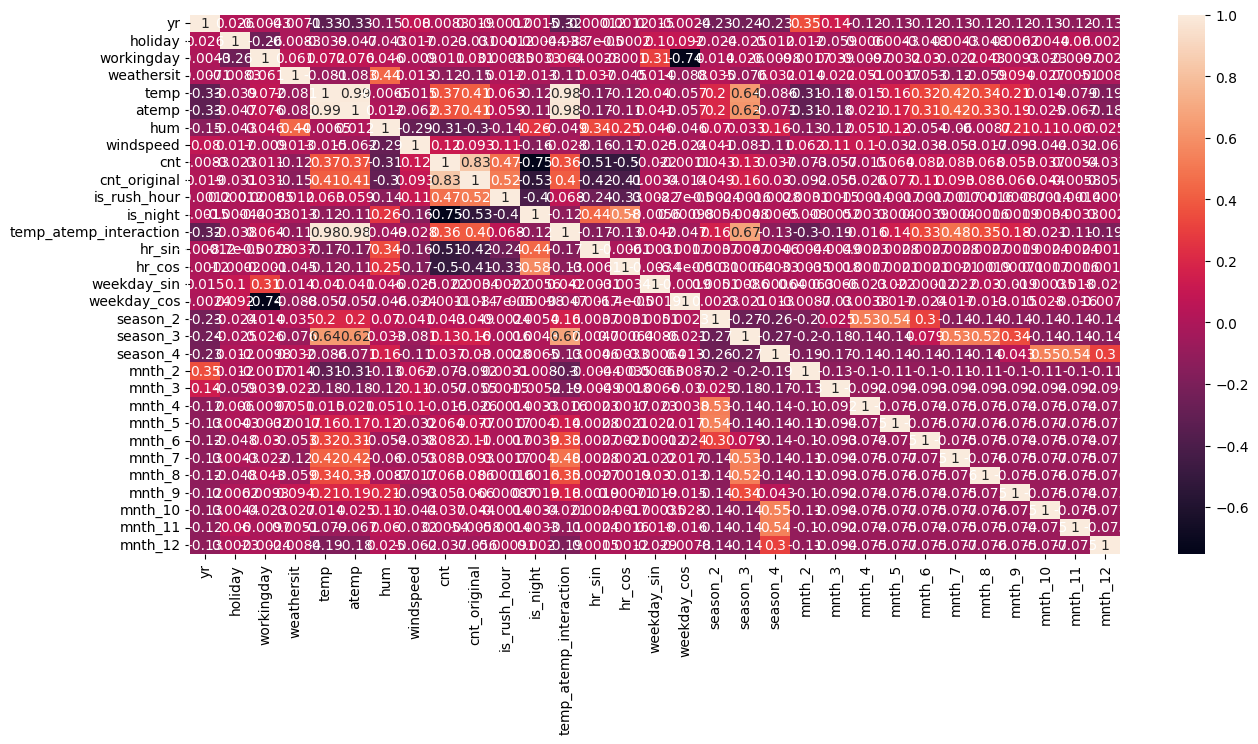

In [ ]:
corr = train_lr.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

In [ ]:
X_train_lr = train_lr.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_train_lr = train_lr['cnt']  

X_valid_lr = valid_lr.drop(columns = ['cnt', 'cnt_original'], axis=1)
y_valid_lr = valid_lr['cnt']

X_test_lr = test_lr.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_test_lr = test_lr['cnt']

In [ ]:
# Low variance
def remove_low_variance_features(df, threshold=0.1):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f'Low variance features removed: {low_variance_features}')
    return df_cleaned, low_variance_features

# High correlation
def remove_highly_correlated_features(df, correlation_threshold=0.45):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f'Highly correlated features removed: {to_drop}')
    return df_cleaned, to_drop

X_train_lr, low_var_cols = remove_low_variance_features(X_train_lr)
X_valid_lr = X_valid_lr.drop(columns=low_var_cols, errors='ignore')
X_test_lr = X_test_lr.drop(columns=low_var_cols, errors='ignore')
X_train_lr, high_corr_cols = remove_highly_correlated_features(X_train_lr)

X_valid_lr = X_valid_lr.drop(columns=high_corr_cols, errors='ignore')
X_test_lr = X_test_lr.drop(columns=high_corr_cols, errors='ignore')

print("Cleaned X_train:", X_train_lr.shape)
print("Cleaned X_valid:", X_valid_lr.shape)
print("Cleaned X_test:", X_test_lr.shape)


Low variance features removed: ['holiday', 'temp_atemp_interaction', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12']
Highly correlated features removed: ['atemp', 'hr_cos', 'weekday_cos', 'season_3']
Cleaned X_train: (10427, 13)
Cleaned X_valid: (3476, 13)
Cleaned X_test: (3476, 13)


## Task 4: Baseline Model – Linear Regression Training
Lecture Material: Lecture 9 (slides 4–7), Lecture 11 (slides 2–4)

- Train a Linear Regression model.
- Evaluate on the validation set using, at least:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R² Score
- Plot at least the residuals and analyze their distribution.
- Reflect on bias and variance characteristics of this model. (THISSS)

Note: Make the training and evaluation of the models as uniform as possible to enable proper comparison. Use the same features to train all the models (before refinement and tuning) and use at least MSE, MAE, and R² Score.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [ ]:
y_pred_lr = model.predict(X_valid_lr)
print(f'Predictions on the validation set: {y_pred_lr}')

Predictions on the validation set: [3.26875173 3.2367178  3.15971492 ... 5.83392636 5.56433101 5.54132675]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_log = mean_squared_error(y_valid_lr, y_pred_lr)
mae_log = mean_absolute_error(y_valid_lr, y_pred_lr)
r2_log = r2_score(y_valid_lr, y_pred_lr)

print(f'MSE (log): {mse_log:.4f}')
print(f'MAE (log): {mae_log:.4f}')
print(f'R^2 (log): {r2_log:.4f}')

MSE (log): 0.5083
MAE (log): 0.5425
R^2 (log): 0.7361


In [ ]:
"""
comment = input("Add a comment about this model run (changes, insights, notes): ")

log_entry = {
    'Model': "Linear Regression",
    'R2_Score': r2_log,
    'MSE': mse_log,
    'MAE': mae_log,
    'Features_Used': X_train_lr.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)

df_log.to_csv("model_log.csv", index=False)
"""

'\ncomment = input("Add a comment about this model run (changes, insights, notes): ")\n\nlog_entry = {\n    \'Model\': "Linear Regression",\n    \'R2_Score\': r2_log,\n    \'MSE\': mse_log,\n    \'MAE\': mae_log,\n    \'Features_Used\': X_train_lr.columns.tolist(),\n    \'Comment\': comment\n}\n\ndf_log = pd.read_csv("model_log.csv")\ndf_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)\n\ndf_log.to_csv("model_log.csv", index=False)\n'

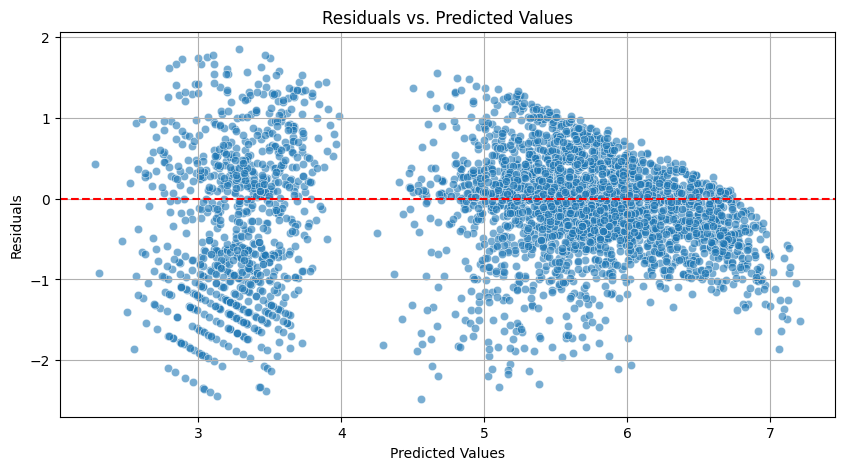

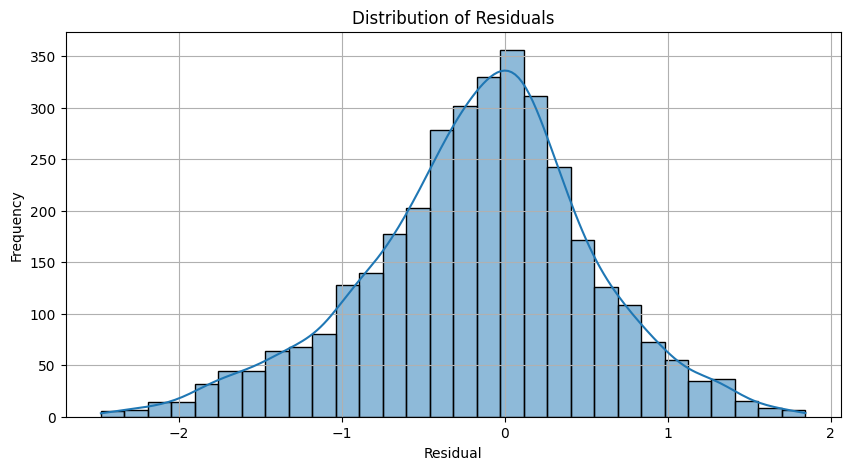

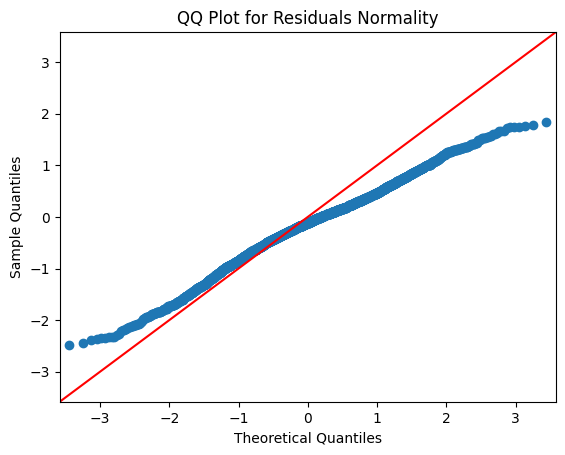

In [ ]:
import statsmodels.api as sm

residuals_log = y_valid_lr - y_pred_lr


plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_lr, y=residuals_log, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(residuals_log, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sm.qqplot(residuals_log, line ='45')  
plt.title("QQ Plot for Residuals Normality")
plt.show()

We can see that the distribution of our residuals can be considered normal.

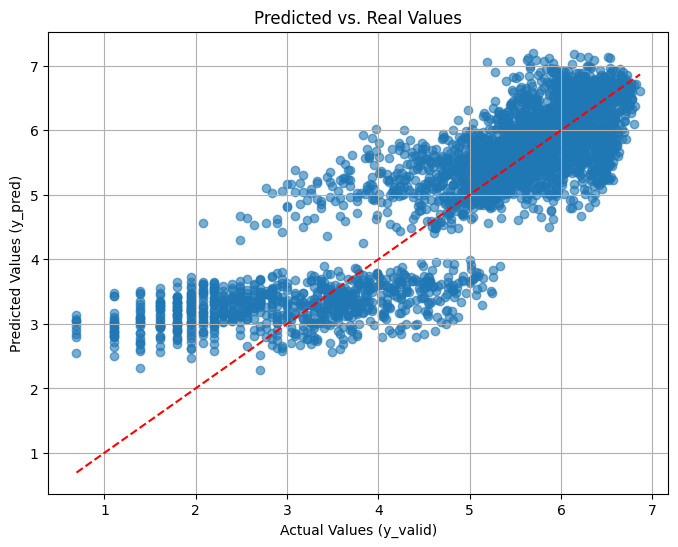

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid_lr, y_pred_lr, alpha=0.6)
plt.plot([min(y_valid_lr), max(y_valid_lr)], [min(y_valid_lr), max(y_valid_lr)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title("Predicted vs. Real Values")
plt.xlabel("Actual Values (y_valid)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid(True)
plt.show()

Since linear regression assumes a linear relationship, it may oversimplify complex data patterns, leading to underfitting. This is a reflection of its high bias: it makes strong assumptions about the form of the relationship in the data. On the other hand, it generally doesn't overfit the training data, which is why it often performs worse compared to more complex models on datasets with non linear relationships. This is due
to its low variance, small changes in the training data typically do not cause large cahnges in the model's predictions.

# Random Forest Regressor

## Task 3: Feature Engineering for Random Forest
Lecture Material: Lecture 9 (slides 2–8), Lecture 12 (slides 4–9)
- Encode cyclical features (hr, weekday) using sine and cosine transforms.
- One-hot encode categorical variables: season, weathersit, and mnth.
- Apply scaling (e.g., StandardScaler) to continuous features: temp, atemp, hum, and windspeed.
- Fit all transformations using only the training set, and apply them to validation and test sets.
- Consider interaction terms such as temp × humidity if they are justified by EDA.
- Remove leaky or redundant features (e.g., atemp if highly collinear with temp).

In [ ]:
# drop: is_night
train_rf = train_rf.drop(columns=['is_night'], axis=1)
valid_rf = valid_rf.drop(columns=['is_night'], axis=1)
test_rf = test_rf.drop(columns=['is_night'], axis=1)

### 3.1 Encode cyclical features

There is no encoding on random forest

In [ ]:
def encode_cyclical(df):
    df['hr_sin'] = np.sin(2 * np.pi * df["hr"] / 24)
    df['hr_cos'] = np.cos(2 * np.pi * df["hr"] / 24)

    df['weekday_sin'] = np.sin(2 * np.pi * df["weekday"] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df["weekday"] / 7)

    #df['mnth_sin'] = np.sin(2 * np.pi * df['mnth'] / 12)
    #df['mnth_cos'] = np.cos(2 * np.pi * df['mnth'] / 12)

    df = df.drop(columns=['hr', 'weekday'])
    
    return df

# train_rf = encode_cyclical(train_rf)
# valid_rf = encode_cyclical(valid_rf)
# test_rf = encode_cyclical(test_rf)

# print(train_rf.head())
# print(valid_rf.head())
# print(test_rf.head()) 

### 3.2 One hot encoding

As in the linear regression, weathesit is not going to be encoded as it shows a hierarchy between the values. And we are only going to encode season.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['season']

encoder = OneHotEncoder(drop='first', sparse_output=False)

# encoding
train_encoded = encoder.fit_transform(train_rf[categorical_features])
valid_encoded = encoder.transform(valid_rf[categorical_features])
test_encoded = encoder.transform(test_rf[categorical_features])

# remaking the df
encoded_columns = encoder.get_feature_names_out(categorical_features)
train_encoded_rf = pd.DataFrame(train_encoded, columns=encoded_columns, index=train_rf.index)
valid_encoded_rf = pd.DataFrame(valid_encoded, columns=encoded_columns, index=valid_rf.index)
test_encoded_rf = pd.DataFrame(test_encoded, columns=encoded_columns, index=test_rf.index)

# concatenate
train_rf = pd.concat([train_rf.drop(columns=categorical_features), train_encoded_rf], axis=1)
valid_rf = pd.concat([valid_rf.drop(columns=categorical_features), valid_encoded_rf], axis=1)
test_rf = pd.concat([test_rf.drop(columns=categorical_features), test_encoded_rf], axis=1)

print(train_rf.head())
print(valid_rf.head())
print(test_rf.head())



   yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0   0     1   0        0        6           0           1  0.24  0.2879  0.81   
1   0     1  23        0        6           0           2  0.46  0.4545  0.88   
2   0     1  22        0        6           0           2  0.40  0.4091  0.94   
3   0     1  21        0        6           0           2  0.40  0.4091  0.87   
4   0     1  20        0        6           0           2  0.40  0.4091  0.87   

   windspeed       cnt  cnt_original  is_rush_hour  season_2  season_3  \
0     0.0000  2.833213            16             0       0.0       0.0   
1     0.2985  3.688879            39             0       0.0       0.0   
2     0.2239  3.367296            28             0       0.0       0.0   
3     0.1940  3.555348            34             0       0.0       0.0   
4     0.2537  3.610918            36             0       0.0       0.0   

   season_4  
0       0.0  
1       0.0  
2       0.0  
3       0.0 

### 3.3 Windspeed

We saw on the EDA that windspeed is right skewed, so we are going to apply a log transformation to it.

In [ ]:
# log1p transformation of windspeed
train_rf['windspeed'] = np.log1p(train_rf['windspeed'])
valid_rf['windspeed'] = np.log1p(valid_rf['windspeed'])
test_rf['windspeed'] = np.log1p(test_rf['windspeed'])

### 3.4 Scaling

In [ ]:
continuous_features = ["temp", "atemp", "hum", "windspeed"]

# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_rf[continuous_features])

train_rf[continuous_features] = scaler.transform(train_rf[continuous_features])
valid_rf[continuous_features] = scaler.transform(valid_rf[continuous_features])
test_rf[continuous_features] = scaler.transform(test_rf[continuous_features])

# verify
print('Train set after scaling:')
print(train_rf[continuous_features].head())

print('\nValidation set after scaling:')
print(valid_rf[continuous_features].head())

print('\nTest set after scaling:')
print(test_rf[continuous_features].head())

Train set after scaling:
       temp     atemp       hum  windspeed
0 -1.113265 -0.873137  0.910999  -1.676641
1  0.000903  0.066143  1.268879   0.849531
2 -0.302961 -0.189819  1.575634   0.277322
3 -0.302961 -0.189819  1.217753   0.038123
4 -0.302961 -0.189819  1.217753   0.509975

Validation set after scaling:
           temp     atemp       hum  windspeed
10427  0.203479  0.236972 -0.213769  -0.715409
10428  0.203479  0.236972 -0.213769  -1.676641
10429  0.203479  0.236972 -0.009266  -1.676641
10430 -0.100385 -0.018990  0.706495  -0.715409
10431  0.507343  0.493498 -0.162643  -0.457937

Test set after scaling:
           temp     atemp       hum  windspeed
13903  1.418935  1.433342  0.348615  -0.457937
13904  1.216359  1.262513  1.064376   0.038123
13905  1.216359  1.262513  1.064376  -0.457937
13906  1.216359  1.262513  1.064376  -0.457937
13907  1.216359  1.262513  1.064376  -1.676641


### 3.5 Interaction terms 

In [ ]:
train_rf['temp_atemp_interaction'] = train_rf['temp'] * train_rf['atemp']
# train_rf['hour_temp_interaction'] = train_rf['hr'] * train_rf['temp']
train_rf['temp_hum_interaction'] = train_rf['temp'] * train_rf['hum']

# Create interaction terms for valid_rf
valid_rf['temp_atemp_interaction'] = valid_rf['temp'] * valid_rf['atemp']
# valid_rf['hour_temp_interaction'] = valid_rf['hr'] * valid_rf['temp']
valid_rf['temp_hum_interaction'] = valid_rf['temp'] * valid_rf['hum']

# Create interaction terms for test_rf
test_rf['temp_atemp_interaction'] = test_rf['temp'] * test_rf['atemp']
# test_rf['hour_temp_interaction'] = test_rf['hr'] * test_rf['temp']
test_rf['temp_hum_interaction'] = test_rf['temp'] * test_rf['hum']

### 3.6 Feature Selection

<Axes: >

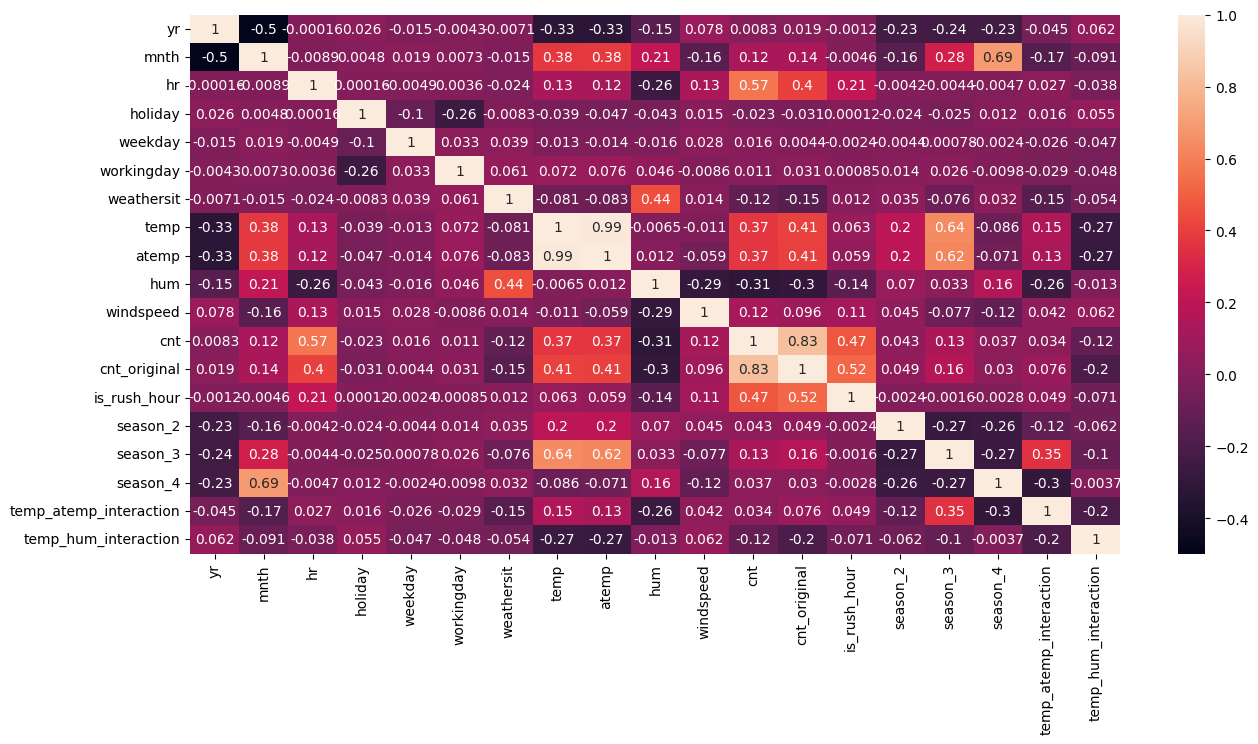

In [ ]:
corr = train_rf.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

In [ ]:
X_train_rf = train_rf.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_train_rf = train_rf['cnt']  
X_valid_rf = valid_rf.drop(columns = ['cnt', 'cnt_original'], axis=1)
y_valid_rf = valid_rf['cnt']
X_test_rf = test_rf.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_test_rf = test_rf['cnt'] 

In [ ]:
X_train_rf.var()

yr                         0.141708
mnth                      13.096534
hr                        47.737482
holiday                    0.028759
weekday                    4.013427
workingday                 0.216589
weathersit                 0.426182
temp                       1.000096
atemp                      1.000096
hum                        1.000096
windspeed                  1.000096
is_rush_hour               0.223205
season_2                   0.166656
season_3                   0.168692
season_4                   0.162790
temp_atemp_interaction     1.045705
temp_hum_interaction       0.935661
dtype: float64

In [ ]:
# Low variance
def remove_low_variance_features(df, threshold=0.1):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f'Low variance features removed: {low_variance_features}')
    return df_cleaned, low_variance_features

# High correlation
def remove_highly_correlated_features(df, correlation_threshold=0.65):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f'Highly correlated features removed: {to_drop}')
    return df_cleaned, to_drop

X_train_rf, low_var_cols = remove_low_variance_features(X_train_rf)
X_valid_rf = X_valid_rf.drop(columns=low_var_cols, errors='ignore')
X_test_rf = X_test_rf.drop(columns=low_var_cols, errors='ignore')
X_train_rf, high_corr_cols = remove_highly_correlated_features(X_train_rf)

X_valid_rf = X_valid_rf.drop(columns=high_corr_cols, errors='ignore')
X_test_rf = X_test_rf.drop(columns=high_corr_cols, errors='ignore')

print("Cleaned X_train:", X_train_rf.shape)
print("Cleaned X_valid:", X_valid_rf.shape)
print("Cleaned X_test:", X_test_rf.shape)

Low variance features removed: ['holiday']
Highly correlated features removed: ['atemp', 'season_4']
Cleaned X_train: (10427, 14)
Cleaned X_valid: (3476, 14)
Cleaned X_test: (3476, 14)


## Task 5: Random Forest Regressor – Model Specification and Training
Lecture Material: Lecture 11 (slides 5–7), Lecture 12 (slides 4–5)
- Train a Random Forest Regressor.
- Use default or initial parameters (e.g., 100 trees, no depth limit) to establish a baseline.
- Evaluate using the same metrics as above.
- Compare with the baseline model and explain observed differences.
- Include at least a feature importance plot and comment on top predictors. 



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=2025)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_valid_rf)

In [ ]:
mse_rf_log = mean_squared_error(y_valid_rf, y_pred_rf)
mae_rf_log = mean_absolute_error(y_valid_rf, y_pred_rf)
r2_rf_log = r2_score(y_valid_rf, y_pred_rf)

print(f'MSE (log): {mse_rf_log:.4f}')
print(f'MAE (log): {mae_rf_log:.4f}')
print(f'R^2 (log): {r2_rf_log:.4f}')

MSE (log): 0.1920
MAE (log): 0.3710
R^2 (log): 0.9003


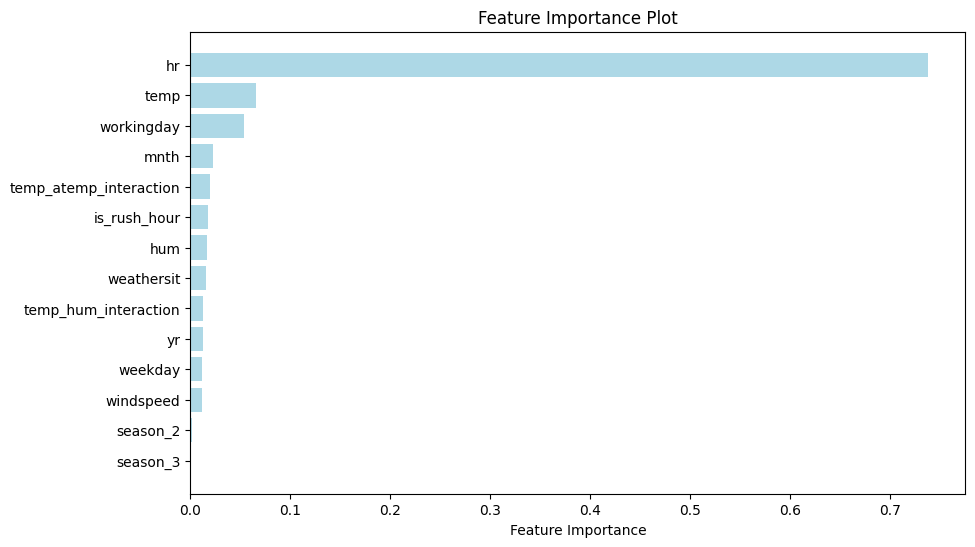

In [ ]:
importances = rf_model.feature_importances_

features = X_train_rf.columns
indices = importances.argsort()

# importance plot
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


Looking at the feature importance plot, hour clearly is the most influential factor with an importance score of approximately 0.72. Temperature and working day follow as second and third most important predictors with scores around 0.08 and 0.07 respectively. Monthly patterns and the temperature-apparent temperature interaction show smaller influence with scores near 0.03. The remaining features, including humidity, weather situation, and seasonal variables, contribute minimally to predictions. This shows that the main factor for rental
behavior is the time of day and more generally, all time related features.

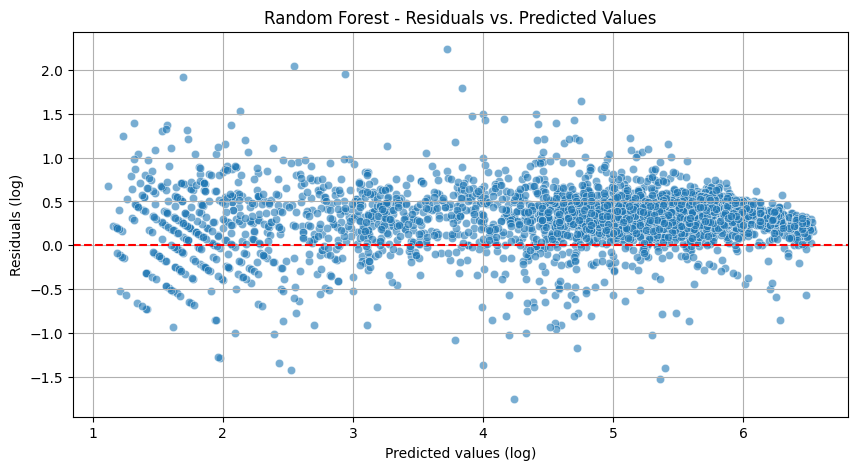

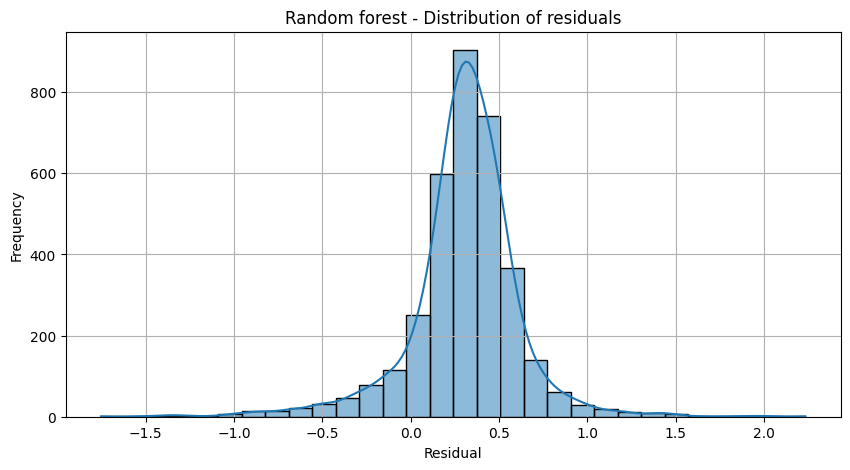

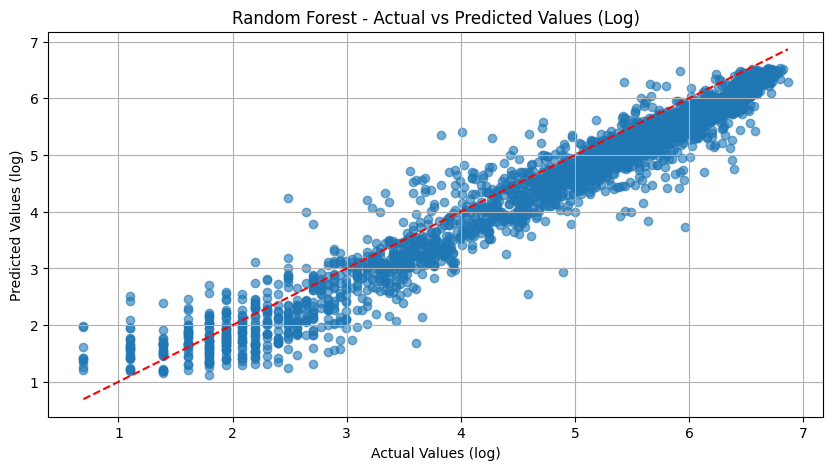

In [ ]:
residuals_rf_log = y_valid_rf - y_pred_rf

# Residuals vs Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf_log, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest - Residuals vs. Predicted Values")
plt.xlabel("Predicted values (log)")
plt.ylabel("Residuals (log)")
plt.grid(True)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf_log, bins=30, kde=True)
plt.title("Random forest - Distribution of residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_valid_rf, y_pred_rf, alpha=0.6)
plt.plot([min(y_valid_rf), max(y_valid_rf)], 
         [min(y_valid_rf), max(y_valid_rf)], 
         color='red', linestyle='--') 
plt.title("Random Forest - Actual vs Predicted Values (Log)")
plt.xlabel("Actual Values (log)")
plt.ylabel("Predicted Values (log)")
plt.grid(True)
plt.show()


In [ ]:
"""
comment = input("Add a comment about this model run (changes, insights, notes): ")

log_entry = {
    'Model': "Random forest",
    'R2_Score': r2_rf_log,
    'MSE': mse_rf_log,
    'MAE': mae_rf_log,
    'Features_Used': X_train_rf.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)

df_log.to_csv("model_log.csv", index=False)
"""

'\ncomment = input("Add a comment about this model run (changes, insights, notes): ")\n\nlog_entry = {\n    \'Model\': "Random forest",\n    \'R2_Score\': r2_rf_log,\n    \'MSE\': mse_rf_log,\n    \'MAE\': mae_rf_log,\n    \'Features_Used\': X_train_rf.columns.tolist(),\n    \'Comment\': comment\n}\n\ndf_log = pd.read_csv("model_log.csv")\ndf_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)\n\ndf_log.to_csv("model_log.csv", index=False)\n'

**Linear Regression vs Random Forest**

The performance of Random Forest (0.9003) significantly outperforms that of Linear Regression (0.7361) in predicting bike rentals. One possible reason for this difference is that Random Forest is a non-linear model capable of capturing more complex patterns in the data, while Linear Regression assumes a simple linear relationship between the features and the target. In addition, Random Forest is less prone to
underfitting and can handle a larger set of features effectively

## Task 7: Hyperparameter Tuning - Random Forest Regressor
Lecture Material: Lecture 12 (slides 6–9), Class 10 Training Notebook
- Tune the Random Forest Regressor:
    - Use Randomized Search CV with 5-fold cross-validation.
    - Tune the following hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf
    - Report: Best parameter combination, Validation performance, Updated feature importance

- Tune the Gradient Boosting Regressor:
    - Use Bayesian Optimization (e.g., via BayesSearchCV).
    - Tune the following hyperparameters: learning_rate, n_estimators, max_depth, subsample
    - Visualize convergence of the optimizer if possible.
    - Report: Best parameters, Cross-validated performance, Impact of tuning on generalization

- Explain whether tuning significantly improved performance or not, and hypothesize why (e.g., model variance, overfitting, flat loss surface, etc.).

Note: Compare pre- and post-tuning performance. Highlight overfitting, underfitting, or convergence issues. This task is part of a broader iterative loop — feel free to return to earlier tasks if the results are suboptimal.

Training model with combined data...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'n_estimators': np.int64(100), 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}

Metrics in logarithmic space (test set):
MSE (log): 0.1719
MAE (log): 0.2975
R^2 (log): 0.9130

Feature importances:
hr: 0.7422
temp: 0.0800
workingday: 0.0511
yr: 0.0209
mnth: 0.0173
temp_atemp_interaction: 0.0165
is_rush_hour: 0.0146
weathersit: 0.0136
hum: 0.0130
weekday: 0.0106
temp_hum_interaction: 0.0104
windspeed: 0.0082
season_2: 0.0012
season_3: 0.0003


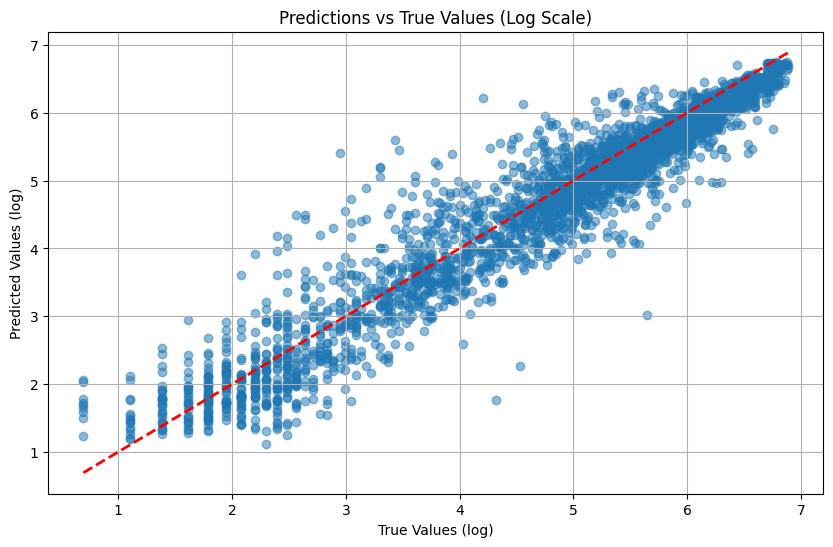

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

X_train_valid_rf = pd.concat([X_train_rf, X_valid_rf])
y_train_valid_rf = pd.concat([y_train_rf, y_valid_rf])

rf_model = RandomForestRegressor(random_state=42)

# parameters
param_grid_rf = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Training model with combined data...")
random_search_rf.fit(X_train_valid_rf, y_train_valid_rf)

best_params_rf = random_search_rf.best_params_
print(f"Best parameters: {best_params_rf}")

#residuals and metrics
y_pred_rf_test = random_search_rf.best_estimator_.predict(X_test_rf)

mse_rf_test_log = mean_squared_error(y_test_rf, y_pred_rf_test)
mae_rf_test_log = mean_absolute_error(y_test_rf, y_pred_rf_test)
r2_rf_test_log = r2_score(y_test_rf, y_pred_rf_test)

print(f"\nMetrics in logarithmic space (test set):")
print(f"MSE (log): {mse_rf_test_log:.4f}")
print(f"MAE (log): {mae_rf_test_log:.4f}")
print(f"R^2 (log): {r2_rf_test_log:.4f}")

# feature importances
feature_importances_rf = random_search_rf.best_estimator_.feature_importances_
features = X_train_rf.columns
print("\nFeature importances:")
for feature, importance in sorted(zip(features, feature_importances_rf), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# actual vs predicted (test set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf_test, alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()], 
         [y_test_rf.min(), y_test_rf.max()], 
         'r--', lw=2)
plt.xlabel('True Values (log)')
plt.ylabel('Predicted Values (log)')
plt.title('Predictions vs True Values (Log Scale)')
plt.grid(True)
plt.show()

The tuned Random Forest model showed improved performance over the baseline model. The best parameters found were
n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=None, and max_depth=20. With these settings, the R^2 score increased from 0.9003 to 0.9130, while both MSE and MAE decreased, indicating better prediction accuracy.

In [ ]:
"""
rf_tuned_comment = input("Añade un comentario sobre los resultados del Random Forest optimizado: ")

rf_tuned_log_entry = {
    'Model': "Random Forest (tuned)",
    'R2_Score': r2_rf_test_log,
    'MSE': mse_rf_test_log,
    'MAE': mae_rf_test_log,
    'Features_Used': X_test_rf.columns.tolist(),
    'Comment': f"Mejores parámetros: {best_params_rf}. {rf_tuned_comment}"
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([rf_tuned_log_entry])], ignore_index=True)
df_log.to_csv("model_log.csv", index=False)
"""

'\nrf_tuned_comment = input("Añade un comentario sobre los resultados del Random Forest optimizado: ")\n\nrf_tuned_log_entry = {\n    \'Model\': "Random Forest (tuned)",\n    \'R2_Score\': r2_rf_test_log,\n    \'MSE\': mse_rf_test_log,\n    \'MAE\': mae_rf_test_log,\n    \'Features_Used\': X_test_rf.columns.tolist(),\n    \'Comment\': f"Mejores parámetros: {best_params_rf}. {rf_tuned_comment}"\n}\n\ndf_log = pd.read_csv("model_log.csv")\ndf_log = pd.concat([df_log, pd.DataFrame([rf_tuned_log_entry])], ignore_index=True)\ndf_log.to_csv("model_log.csv", index=False)\n'

# Gradient Boosting Regressor

## Task 3: Feature Engineering for Random Forest
Lecture Material: Lecture 9 (slides 2–8), Lecture 12 (slides 4–9)
- Encode cyclical features (hr, weekday) using sine and cosine transforms.
- One-hot encode categorical variables: season, weathersit, and mnth.
- Apply scaling (e.g., StandardScaler) to continuous features: temp, atemp, hum, and windspeed.
- Fit all transformations using only the training set, and apply them to validation and test sets.
- Consider interaction terms such as temp × humidity if they are justified by EDA.
- Remove leaky or redundant features (e.g., atemp if highly collinear with temp).

### 3.1 Interaction terms 
such as temp × humidity if they are justified by EDA

In [ ]:
# train_xgb['weathersit_hum_interaction'] = train_xgb['weathersit'] * train_xgb['hum']
train_xgb['temp_atemp_interaction'] = train_xgb['temp'] * train_xgb['atemp']
# train_xgb['temp_hour_interaction'] = train_xgb['temp'] * train_xgb['hr']
train_xgb['temp_hum_interaction'] = train_xgb['temp'] * train_xgb['hum']

# valid_xgb['weathersit_hum_interaction'] = valid_xgb['weathersit'] * valid_xgb['hum']
valid_xgb['temp_atemp_interaction'] = valid_xgb['temp'] * valid_xgb['atemp']
# valid_xgb['temp_hour_interaction'] = valid_xgb['temp'] * valid_xgb['hr']
valid_xgb['temp_hum_interaction'] = valid_xgb['temp'] * valid_xgb['hum']

# test_xgb['weathersit_hum_interaction'] = test_xgb['weathersit'] * test_xgb['hum']
test_xgb['temp_atemp_interaction'] = test_xgb['temp'] * test_xgb['atemp']
# test_xgb['temp_hour_interaction'] = test_xgb['temp'] * test_xgb['hr']
test_xgb['temp_hum_interaction'] = test_xgb['temp'] * test_xgb['hum']


### 3.2 Encode cyclical features

In [ ]:
def encode_cyclical(df):
    df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
    df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

    df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
    df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

    #df['mnth_sin'] = np.sin(2 * np.pi * df['mnth'] / 12)
    #df['mnth_cos'] = np.cos(2 * np.pi * df['mnth'] / 12)

    df = df.drop(columns=["hr", "weekday"])
    
    return df

train_xgb = encode_cyclical(train_xgb).drop(columns = ['is_rush_hour', 'is_night'], axis=1)
valid_xgb = encode_cyclical(valid_xgb).drop(columns = ['is_rush_hour', 'is_night'], axis=1)
test_xgb = encode_cyclical(test_xgb).drop(columns = ['is_rush_hour', 'is_night'], axis=1)
print(train_xgb.head())
print(valid_xgb.head())
print(test_xgb.head())

   season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1        0           0           1  0.24  0.2879  0.81   
1       1   0     1        0           0           2  0.46  0.4545  0.88   
2       1   0     1        0           0           2  0.40  0.4091  0.94   
3       1   0     1        0           0           2  0.40  0.4091  0.87   
4       1   0     1        0           0           2  0.40  0.4091  0.87   

   windspeed       cnt  cnt_original  temp_atemp_interaction  \
0     0.0000  2.833213            16                0.069096   
1     0.2985  3.688879            39                0.209070   
2     0.2239  3.367296            28                0.163640   
3     0.1940  3.555348            34                0.163640   
4     0.2537  3.610918            36                0.163640   

   temp_hum_interaction    hr_sin    hr_cos  weekday_sin  weekday_cos  
0                0.1944  0.000000  1.000000    -0.781831      0.62349  
1             

### 3.3 One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['season', 'mnth']

encoder = OneHotEncoder(drop="first", sparse_output=False)

# encoding
train_encoded = encoder.fit_transform(train_xgb[categorical_features])
valid_encoded = encoder.transform(valid_xgb[categorical_features])
test_encoded = encoder.transform(test_xgb[categorical_features])

# remaking the df
encoded_columns = encoder.get_feature_names_out(categorical_features)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_columns, index=train_xgb.index)
valid_encoded_df = pd.DataFrame(valid_encoded, columns=encoded_columns, index=valid_xgb.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_columns, index=test_xgb.index)

# concatenate
train_xgb = pd.concat([train_xgb.drop(columns=categorical_features), train_encoded_df], axis=1)
valid_xgb = pd.concat([valid_xgb.drop(columns=categorical_features), valid_encoded_df], axis=1)
test_xgb = pd.concat([test_xgb.drop(columns=categorical_features), test_encoded_df], axis=1)

print(train_xgb.head())
print(valid_xgb.head())
print(test_xgb.head())


   yr  holiday  workingday  weathersit  temp   atemp   hum  windspeed  \
0   0        0           0           1  0.24  0.2879  0.81     0.0000   
1   0        0           0           2  0.46  0.4545  0.88     0.2985   
2   0        0           0           2  0.40  0.4091  0.94     0.2239   
3   0        0           0           2  0.40  0.4091  0.87     0.1940   
4   0        0           0           2  0.40  0.4091  0.87     0.2537   

        cnt  cnt_original  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  \
0  2.833213            16  ...     0.0     0.0     0.0     0.0     0.0   
1  3.688879            39  ...     0.0     0.0     0.0     0.0     0.0   
2  3.367296            28  ...     0.0     0.0     0.0     0.0     0.0   
3  3.555348            34  ...     0.0     0.0     0.0     0.0     0.0   
4  3.610918            36  ...     0.0     0.0     0.0     0.0     0.0   

   mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  
0     0.0     0.0      0.0      0.0      0.0  
1     0.0     0.0     

### 3.4 Scaling

In [ ]:
continuous_features = ["temp", "atemp", "hum", "windspeed"]

# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_xgb[continuous_features])

train_xgb[continuous_features] = scaler.transform(train_xgb[continuous_features])
valid_xgb[continuous_features] = scaler.transform(valid_xgb[continuous_features])
test_xgb[continuous_features] = scaler.transform(test_xgb[continuous_features])

# verify
print('Train set after scaling:')
print(train_xgb[continuous_features].head())

print('\nValidation set after scaling:')
print(valid_xgb[continuous_features].head())

print('\nTest set after scaling:')
print(test_xgb[continuous_features].head())


Train set after scaling:
       temp     atemp       hum  windspeed
0 -1.113265 -0.873137  0.910999  -1.557673
1  0.000903  0.066143  1.268879   0.817807
2 -0.302961 -0.189819  1.575634   0.224136
3 -0.302961 -0.189819  1.217753  -0.013810
4 -0.302961 -0.189819  1.217753   0.461286

Validation set after scaling:
           temp     atemp       hum  windspeed
10427  0.203479  0.236972 -0.213769  -0.726056
10428  0.203479  0.236972 -0.213769  -1.557673
10429  0.203479  0.236972 -0.009266  -1.557673
10430 -0.100385 -0.018990  0.706495  -0.726056
10431  0.507343  0.493498 -0.162643  -0.488906

Test set after scaling:
           temp     atemp       hum  windspeed
13903  1.418935  1.433342  0.348615  -0.488906
13904  1.216359  1.262513  1.064376  -0.013810
13905  1.216359  1.262513  1.064376  -0.488906
13906  1.216359  1.262513  1.064376  -0.488906
13907  1.216359  1.262513  1.064376  -1.557673


### 3.5 Feature Selection

<Axes: >

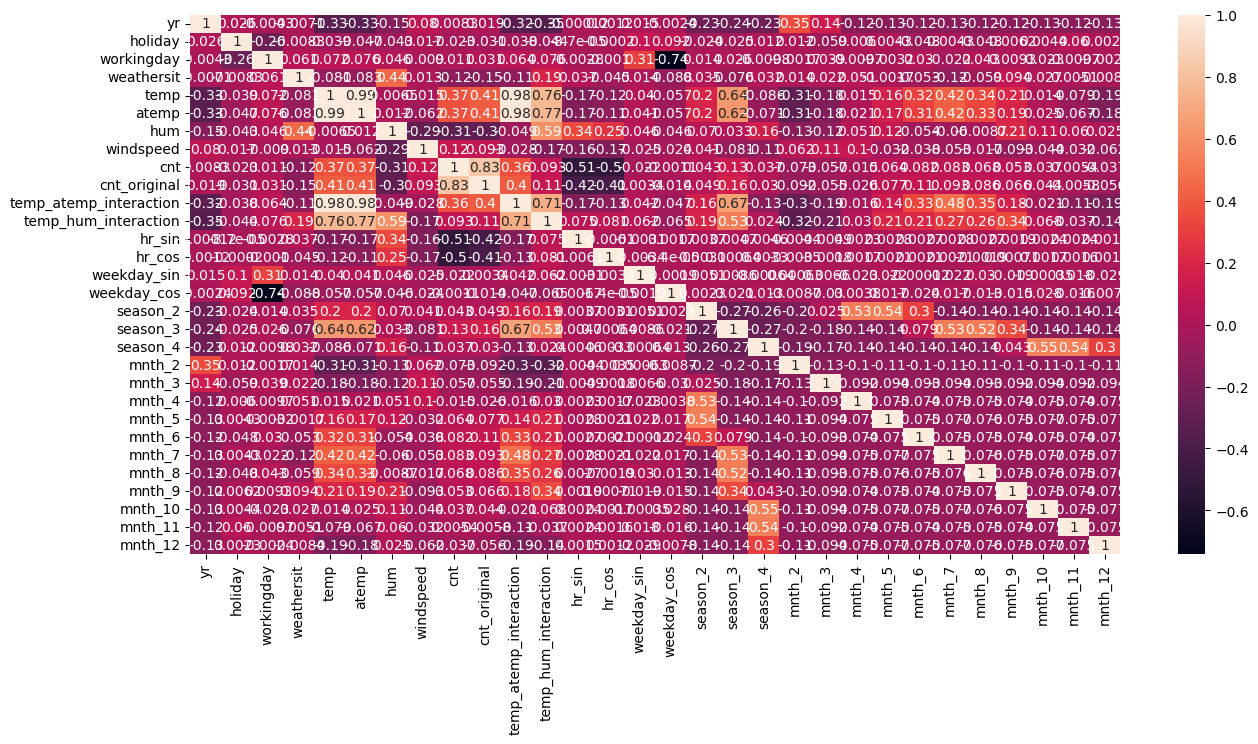

In [ ]:
corr = train_xgb.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

In [ ]:
X_train_xgb = train_xgb.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_train_xgb = train_xgb['cnt']  
X_valid_xgb = valid_xgb.drop(columns = ['cnt', 'cnt_original'], axis=1)
y_valid_xgb = valid_xgb['cnt']
X_test_xgb = test_xgb.drop(columns = ['cnt', 'cnt_original'], axis=1) 
y_test_xgb = test_xgb['cnt'] 

In [ ]:
X_train_xgb.var()

yr                        0.141708
holiday                   0.028759
workingday                0.216589
weathersit                0.426182
temp                      1.000096
atemp                     1.000096
hum                       1.000096
windspeed                 1.000096
temp_atemp_interaction    0.031439
temp_hum_interaction      0.022345
hr_sin                    0.499270
hr_cos                    0.500748
weekday_sin               0.499561
weekday_cos               0.500527
season_2                  0.166656
season_3                  0.168692
season_4                  0.162790
mnth_2                    0.112079
mnth_3                    0.092782
mnth_4                    0.064207
mnth_5                    0.066268
mnth_6                    0.064290
mnth_7                    0.066268
mnth_8                    0.065198
mnth_9                    0.064041
mnth_10                   0.066186
mnth_11                   0.064207
mnth_12                   0.066022
dtype: float64

In [ ]:
# Low variance
def remove_low_variance_features(df, threshold=0.1):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f'Low variance features removed: {low_variance_features}')
    return df_cleaned, low_variance_features

# High correlation
def remove_highly_correlated_features(df, correlation_threshold=0.5):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f'Highly correlated features removed: {to_drop}')
    return df_cleaned, to_drop

X_train_xgb, low_var_cols = remove_low_variance_features(X_train_xgb)
X_valid_xgb = X_valid_xgb.drop(columns=low_var_cols, errors='ignore')
X_test_xgb = X_test_xgb.drop(columns=low_var_cols, errors='ignore')
X_train_xgb, high_corr_cols = remove_highly_correlated_features(X_train_xgb)

X_valid_xgb = X_valid_xgb.drop(columns=high_corr_cols, errors='ignore')
X_test_xgb = X_test_xgb.drop(columns=high_corr_cols, errors='ignore')

print("Cleaned X_train:", X_train_xgb.shape)
print("Cleaned X_valid:", X_valid_xgb.shape)
print("Cleaned X_test:", X_test_xgb.shape)


Low variance features removed: ['holiday', 'temp_atemp_interaction', 'temp_hum_interaction', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12']
Highly correlated features removed: ['atemp', 'weekday_cos', 'season_3']
Cleaned X_train: (10427, 12)
Cleaned X_valid: (3476, 12)
Cleaned X_test: (3476, 12)


## Task 6: Gradient Boosting Regressor – Model Specification and Training
Lecture Material: Lecture 12 (slides 4–7), Class 10 Training Notebook
- Train a Gradient Boosting Regressor (e.g., XGBoost or LightGBM).
- Use basic parameters to establish initial results.
- Plot at least residuals and compare performance with previous models.
- Note any early signs of overfitting or high variance.

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = xgb_model.predict(X_valid_xgb)

mse_xgb_log = mean_squared_error(y_valid_xgb, y_pred_xgb)
mae_xgb_log = mean_absolute_error(y_valid_xgb, y_pred_xgb)
r2_xgb_log = r2_score(y_valid_xgb, y_pred_xgb)

print(f'Metrics in logarithmic space:')
print(f'MSE (log): {mse_xgb_log:.4f}')
print(f'MAE (log): {mae_xgb_log:.4f}')
print(f'R^2 (log): {r2_xgb_log:.4f}')

Metrics in logarithmic space:
MSE (log): 0.1323
MAE (log): 0.2762
R^2 (log): 0.9313


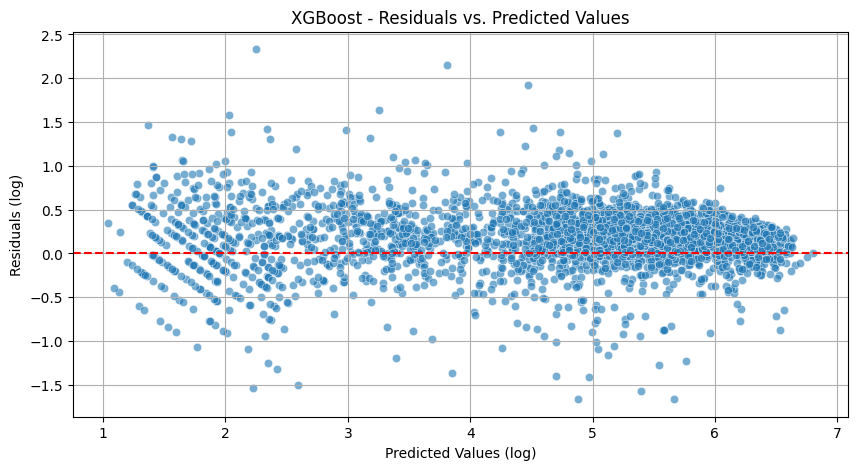

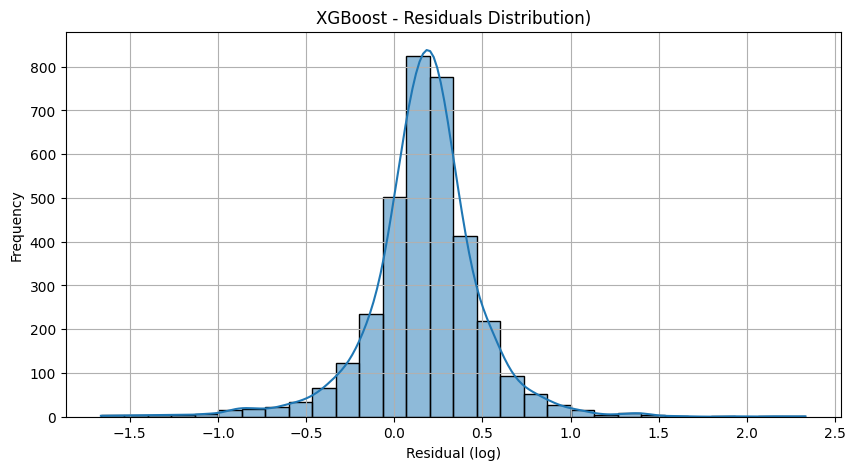

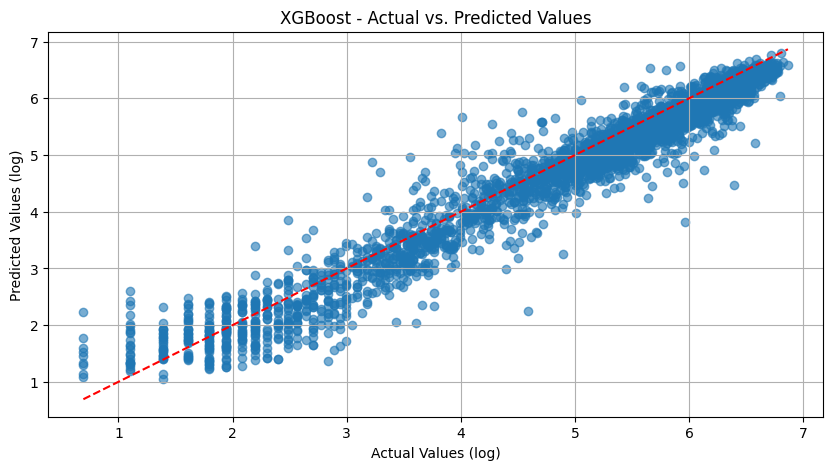

In [ ]:
residuals_xgb = y_valid_xgb - y_pred_xgb

# plot residuals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("XGBoost - Residuals vs. Predicted Values")
plt.xlabel("Predicted Values (log)")
plt.ylabel("Residuals (log)")
plt.grid(True)
plt.show()

# histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title("XGBoost - Residuals Distribution)")
plt.xlabel("Residual (log)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# QQ plot for residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_valid_xgb, y_pred_xgb, alpha=0.6)
plt.plot([min(y_valid_xgb), max(y_valid_xgb)], 
         [min(y_valid_xgb), max(y_valid_xgb)], 
         color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title("XGBoost - Actual vs. Predicted Values")
plt.xlabel("Actual Values (log)")
plt.ylabel("Predicted Values (log)")
plt.grid(True)
plt.show()



We can see that there are some predictions that are more distant, which could be a sign of overfitting. During hyperparameter tuning, the XGBoost model initially showed a good performance on the training and validation sets. However, when evaluated on the test set, the metrics slightly declined with a 60/20/20 train/validation/test split, and dropped more noticeably with an 80/10/10 split. This suggests early signs of overfitting and potential high variance, as the model may be learning the training data too closely, especially when the validation set is small.

In [ ]:
"""
comment = input("Añade un comentario sobre esta ejecución del modelo (cambios, insights, notas): ")

log_entry = {
    'Model': "XGBoost (log)",
    'R2_Score': r2_xgb_log,
    'MSE': mse_xgb_log,
    'MAE': mae_xgb_log,
    'Features_Used': X_train_xgb.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)
df_log.to_csv("model_log.csv", index=False)
"""

'\ncomment = input("Añade un comentario sobre esta ejecución del modelo (cambios, insights, notas): ")\n\nlog_entry = {\n    \'Model\': "XGBoost (log)",\n    \'R2_Score\': r2_xgb_log,\n    \'MSE\': mse_xgb_log,\n    \'MAE\': mae_xgb_log,\n    \'Features_Used\': X_train_xgb.columns.tolist(),\n    \'Comment\': comment\n}\n\ndf_log = pd.read_csv("model_log.csv")\ndf_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)\ndf_log.to_csv("model_log.csv", index=False)\n'

XGBoost performs the best with a score of 0.9313. It works better than Random Forest, which has a score of 0.9003, and Linear Regression, which performs at 0.7361. Linear Regression has trouble because it assumes a straight-line relationship, which doesn’t fit well with this data. Random Forest does better because it can capture more complex patterns, but XGBoost outperforms it by focusing on hard-to-predict cases and using regularization to prevent overfitting. This makes XGBoost the strongest model here.

## Task 7: Hyperparameter Tuning
Lecture Material: Lecture 12 (slides 6–9), Class 10 Training Notebook
- Tune the Random Forest Regressor:
    - Use Randomized Search CV with 5-fold cross-validation.
    - Tune the following hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf
    - Report: Best parameter combination, Validation performance, Updated feature importance

- Tune the Gradient Boosting Regressor:
    - Use Bayesian Optimization (e.g., via BayesSearchCV).
    - Tune the following hyperparameters: learning_rate, n_estimators, max_depth, subsample
    - Visualize convergence of the optimizer if possible.
    - Report: Best parameters, Cross-validated performance, Impact of tuning on generalization

- Explain whether tuning significantly improved performance or not, and hypothesize why (e.g., model variance, overfitting, flat loss surface, etc.).

Note: Compare pre- and post-tuning performance. Highlight overfitting, underfitting, or convergence issues. This task is part of a broader iterative loop — feel free to return to earlier tasks if the results are suboptimal.

Training model with combined data...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for

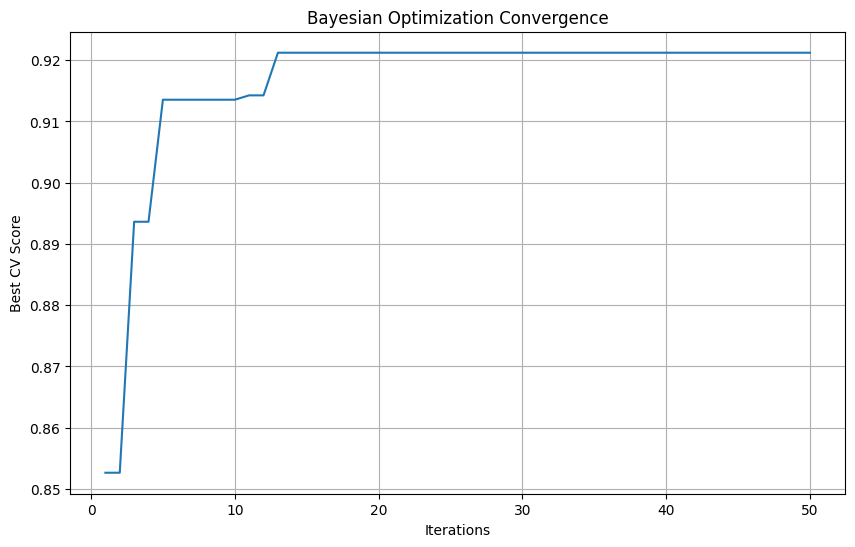

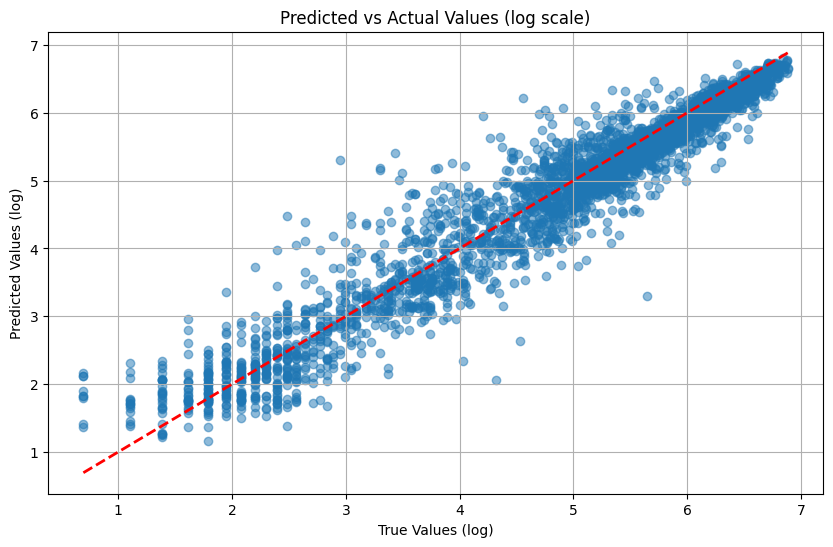

In [ ]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor

X_train_valid_xgb = pd.concat([X_train_xgb, X_valid_xgb])
y_train_valid_xgb = pd.concat([y_train_xgb, y_valid_xgb])

xgb_model = XGBRegressor(random_state=42)

# parameters
param_space_xgb = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space_xgb,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=2025
)

print("Training model with combined data...")
bayes_search_xgb.fit(X_train_valid_xgb, y_train_valid_xgb)

best_params_xgb = bayes_search_xgb.best_params_
print(f"Best parameters: {best_params_xgb}")

# residuals and metrics
y_pred_xgb_test = bayes_search_xgb.best_estimator_.predict(X_test_xgb)

mse_xgb_test_log = mean_squared_error(y_test_xgb, y_pred_xgb_test)
mae_xgb_test_log = mean_absolute_error(y_test_xgb, y_pred_xgb_test)
r2_xgb_test_log = r2_score(y_test_xgb, y_pred_xgb_test)

print(f"\nMetrics in logarithmic space (test set):")
print(f"MSE (log): {mse_xgb_test_log:.4f}")
print(f"MAE (log): {mae_xgb_test_log:.4f}")
print(f"R² (log): {r2_xgb_test_log:.4f}")

# convergence plot
plt.figure(figsize=(10, 6))
results = pd.DataFrame(bayes_search_xgb.cv_results_)
best_scores = results['mean_test_score'].cummax()
plt.plot(range(1, len(best_scores) + 1), best_scores)
plt.xlabel('Iterations')
plt.ylabel('Best CV Score')
plt.title('Bayesian Optimization Convergence')
plt.grid(True)
plt.show()

# predicted vs actual (test set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_xgb, y_pred_xgb_test, alpha=0.5)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], 
         [y_test_xgb.min(), y_test_xgb.max()], 
         'r--', lw=2)
plt.xlabel('True Values (log)')
plt.ylabel('Predicted Values (log)')
plt.title('Predicted vs Actual Values (log scale)')
plt.grid(True)
plt.show()


In [ ]:
"""
xgb_tuned_comment = input("Add a comment about the optimized XGBoost results: ")

xgb_tuned_log_entry = {
    'Model': "XGBoost (tuned)",
    'R2_Score': r2_xgb_test_log,
    'MSE': mse_xgb_test_log,
    'MAE': mae_xgb_test_log,
    'Features_Used': X_test_xgb.columns.tolist(),
    'Comment': f"Best parameters: {best_params_xgb}. {xgb_tuned_comment}"
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([xgb_tuned_log_entry])], ignore_index=True)
df_log.to_csv("model_log.csv", index=False)
"""

'\nxgb_tuned_comment = input("Add a comment about the optimized XGBoost results: ")\n\nxgb_tuned_log_entry = {\n    \'Model\': "XGBoost (tuned)",\n    \'R2_Score\': r2_xgb_test_log,\n    \'MSE\': mse_xgb_test_log,\n    \'MAE\': mae_xgb_test_log,\n    \'Features_Used\': X_test_xgb.columns.tolist(),\n    \'Comment\': f"Best parameters: {best_params_xgb}. {xgb_tuned_comment}"\n}\n\ndf_log = pd.read_csv("model_log.csv")\ndf_log = pd.concat([df_log, pd.DataFrame([xgb_tuned_log_entry])], ignore_index=True)\ndf_log.to_csv("model_log.csv", index=False)\n'

After tuning, the best parameters for XGBoost were: colsample_bytree=1.0, learning_rate=0.082, max_depth=3, n_estimators=500, and subsample=0.5. These settings were found using cross-validation and aimed to balance performance and generalization. While the tuned
model didn’t significantly outperform the default one in terms of R^2 (0.9289 vs. 0.9313), it slightly improved the MAE, suggesting better average prediction accuracy. The slight drop in R^2 could be due to the model slightly overfitting to the validation set. I don’t expect this drop to
be caused by a test dataset with a different distribution, however, since we performed chronological splitting, it's possible that we are seing a small bias.

# Task 8: Iterative Evaluation and Refinement
Lecture Material: Lecture 9 (slides 6–7), Lecture 11 (slides 3–4), Lecture 12 (slide 9)
- Based on model results, revisit EDA and feature engineering if needed. For example:
    - Do new interaction terms help?
    - Should you drop or transform certain features?
    - Are there outliers that are harming performance?

- Model tuning and evaluation (Tasks 4–8) are iterative. Based on performance, you may revisit:
    - Task 3 (Feature Engineering)
    - Add new transformations
    - Adjust model complexity
    - Document all iterations and reasoning thoroughly in the notebook.

Retrain, re-evaluate, and re-tune your models as needed.

Note: I kept a record of all model runs in the file model_log.csv. Here I explain the main changes, although you can find all of them in the csv.


When I began working on the model, I did a first iteration using minimal feature engineering (only the one requested by the professor) and no feature selection. The results were as follows: 

- Linear Regression: R^2 = 0.44
- Random Forest: R^2 = 0.88
- XGBoost: R^2 = 0.89


Both the Random Forest and XGBoost models were used without hyperparameter tuning and without encoding the weathersit feature, but with an 80/10/10 splitting.


**First Iteration**


**Linear regression:**


My idea with this model was to keep it as simple as possible, with minimal feature engineering. I tried implementing interaction terms to capture nonlinear relationships, however, only the temp/atemp interaction was kept. The other two interactions (hum/temp and temp/hour) were deleted because they were highly correlated with other features and decreased the model's performance. 

To address the skew of count, I also added the log transformation, which really improved the model's performance. I also removed the encoding of weathersit to maintain its hierarchical nature. The performance increased to 0.60 in R^2. However, this was with an 80/10/10 split.

**Random Forest and Xgboost:**



I applied all the changes made to the linear regression model to both XGBoost and Random Forest. The performance of both models improved, reaching an R^2 value of 0.94. However, during hyperparameter tuning, the performance decreased, showing signs of overfitting to the training data.


I also noticed that Random Forest performed worse as more features were added. This happens because Random Forest is more prone to overfitting when there are many features, especially if some features are noisy or irrelevant. The model tends to create very deep trees to fit every detail in the data, which can lead to high variance and poor generalization to new data. This is why, for the interaction terms, I kept the temp/atemp interaction for both models but included temp/hum only for XGBoost.


**Second iteration:**


In the second iteration, I decided to change the data split to a 60/20/20, which resulted in the following R^2: 

- Linear Regression: 0.56
- Random Forest: 0.89
- XGBoost: 0.93. 

After hyperparameter tuning, the performance on the test data improved slightly:
-  Random Forest: 0.90
- XGBoost: 0.92. 

With the 80/10/10 split, the model dropped by 0.04 in R^2 after hyperparameter tuning. With 60/20/20 we had more new data for hyperparameter optimization and the results on the tests were more reliable. Also, another hypothesis was that the drop in performance with the 80/10/10 split could have been due to the model overfitting too much, making it appear to perform better but actually performing poorly when exposed to a test set.


**Third Iteration**


**Random Forest**: After some research, I decided not to apply cyclical encoding and one hot encoding in this model. I found that Random Forest tends to perform better when categorical features are left unencoded, as it can automatically handle feature splits in a more flexible way. Random Forest has the ability to find interactions between features during tree splits, which means it doesn't always require explicit encoding for cyclical features to model periodicity effectively. Linear Regression and XGBoost often benefit from more explicit encoding methods. However in Random Forest I did encode season as it is a categorical feature with few categories. Thanks to this performance went up to 0.90 on R^2. 


I kept scaling for both XGBoost and Random Forest because scaling helps improve performance, especially when certain features have much larger or smaller ranges than others. 


I attempted to apply cyclical scaling to the month feature but found that the cycles were too large for our 2-year data, and the transformation misled the model.


**Fourth iteration**


When I added new features such as is_rush and is_night, I saw different impacts. For XGBoost and Random Forest, I noticed that fewer features generally led to better performance as I explained before. In Random Forest, only "is_night" was found to be significant, while "is_rush" was important for both XGBoost and Random Forest. On the other hand, Linear Regression benefited from adding more features, it can improve performance by utilizing the available information from additional features, allowing it to model the data more accurately, always assuming that they have a linear relationship.

**Fifth Iteration**


One of the major challenges in this assignment was selecting the optimal thresholds for low variance and high correlation. I generally tend to be quite restrictive with the thresholds. The 0.1 threshold for low variance was the same across all models. As for the correlation threshold, each model has its own sensitivity to highly correlated features. Linear regression has a threshold of 0.45 because it is very sensitive to multicollinearity, which can destabilize the model. Random Forest has a higher threshold of 0.65 because it can tolerate higher levels of correlation due to its ability to capture interactions between features through tree splits. XGBoost, being in the middle, uses a threshold of 0.5.

**Sixth Iteration**


I implemented the log transformation of windspeed in the Random Forest model because it was right-skewed, as seen in EDA. Random Forest can handle transformed features well because it is a tree-based model, which splits data based on feature values, and log transformation helps in creating more meaningful splits. However, I did not apply the log transformation in Linear Regression or XGBoost for a couple of reasons. For Linear Regression, I wanted to keep the model as simple as possible. For XGBoost, although it can benefit from transformations like log, I knew it can handle skewed features better than the other models. Performance on Random Forest went up to 0.90 on R^2.

# Task 9: Final Model Selection and Testing
Lecture material: Lecture 12 (slides 8–9).
- Select the best-performing model based on validation performance and bias/variance tradeoffs.
- Retrain it on the combined training + validation set.
- Evaluate on the test set using MSE, MAE, and R².
- Report the final metrics and justify why the chosen model generalizes best.

I choose XGBoost becouse the tuned XGBoost achieved almost the highest R^2 score (0.928), along with the MSE of 0.140 and the lowest
MAE of 0.265, suggesting that it generalized well and made accurate predictions across most data points. Unlike Random Forest, which
showed signs of slightly higher variance.

In [ ]:
# combine datasets
X_train_final = pd.concat([X_train_xgb, X_valid_xgb])
y_train_final = pd.concat([y_train_xgb, y_valid_xgb])

# parameter
xgb_final = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.082,
    max_depth=3,
    n_estimators=500,
    subsample=0.5,
    random_state=42
)
# train
xgb_final.fit(X_train_final, y_train_final)
y_pred_test = xgb_final.predict(X_test_xgb)

# metrics
mse = mean_squared_error(y_test_xgb, y_pred_test)
mae = mean_absolute_error(y_test_xgb, y_pred_test)
r2 = r2_score(y_test_xgb, y_pred_test)
print(f"Test MSE: {mse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R^2: {r2:.3f}")

Test MSE: 0.137
Test MAE: 0.259
Test R^2: 0.930


These results show that the model generalizes well without overfitting. The high R^2 indicates that the model explains a large portion of the variance, while the low MSE and MAE confirm that its predictions are accurate. The model's hyperparameters were optimized through cross-validation, ensuring optimal performance. Additionally, the feature engineering, which included log transformations on skewed features, the addition of interaction terms, the introduction of new features, and the selection of relevant features, contributed to achieving this strong result. Compared to the baseline R^2 of 0.74, this performance is signicantly better.